Compare to Astro stars (with old data)

In [22]:
from HeaderP import *
import Astraea
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
import random

In [23]:
Plottype='Rvar'
#df_NN_MS=pd.read_pickle('NewData/'+Plottype+'VP_MS_150_w015_NN.pkl')
#df_NN_giant=pd.read_pickle('NewData/ProtVP_Giant_w015_NN.pkl')

df_bin_MS=pd.read_pickle('NewData/'+Plottype+'VP_MS_150_w015_bin.pkl')
df_bin_MS['age_MAD']=df_bin_MS['age']
df_bin_MS['age_MAD_err']=df_bin_MS['age_err']
print(np.shape(df_bin_MS))
df_bin_MS=df_bin_MS.dropna(subset=['age','age_err'])
print(np.shape(df_bin_MS))
print(np.median(df_bin_MS['age_MAD_err']/df_bin_MS['age_MAD']))
#df_bin_giant=pd.read_pickle('NewData/ProtVP_Giant_w015_bin.pkl')

ASstars=pd.read_table('/Users/lucy/Desktop/KeplerAges/ASage.webarchive',delimiter=',',skiprows=2)
ASstars=ASstars.dropna(subset=['KIC'])
ASstars

Clusters_cm=pd.merge(ASstars,df_bin_MS,left_on='KIC',right_on='KID',how='inner')
Clusters_cm


(88561, 156)
(88561, 156)
0.11299787409217754


Pipe         KIC    Mass     Rad  log(g)      Age     Lum       rho  \
0       AST      3427720.0  1.0990  1.1145  4.3844   2.3521  1.5030  1.117800   
1       BASTA    3427720.0  1.1080  1.1167  4.3868   2.2339  1.5790  1.121488   
2       C2kSMO   3427720.0  1.1016  1.1127  4.3869   2.3038  1.5250  1.126200   
3       GOE      3427720.0  1.0920  1.1108  4.3849   2.3367  1.4831  1.122443   
4   V&amp;A      3427720.0  1.0770  1.1050  4.3838   2.3040  1.5190  1.125990   
..         ...         ...     ...     ...     ...      ...     ...       ...   
85      BASTA   11772920.0  0.8287  0.8438  4.5001  10.6660  0.4870  1.926522   
86      C2kSMO  11772920.0  0.8181  0.8424  4.4995  10.6479  0.4480  1.927600   
87      GOE     11772920.0  0.7810  0.8289  4.4934   9.8981  0.4697  1.931094   
88  V&amp;A     11772920.0  0.7778  0.8276  4.4943   9.4830  0.4800  1.932350   
89      YMCM    11772920.0  0.8506  0.8537  4.5046  10.8050  0.3112  1.924800   

     Dist    Xini  ...        v_t        v_b     abs_G  Rvar_log         vd  \
0   90.93  0.7060  ...  41.507948  12.023812  4.177233  2.683980  18.316949   
1   91.11  0.7030  ...  41.507948  12.023812  4.177233  2.683980  18.316949   
2   90.79  0.7220  ...  41.507948  12.023812  4.177233  2.683980  18.316949   
3   90.62  0.7153  ...  41.507948  12.023812  4.177233  2.683980  18.316949   
4   90.15  0.7120  ...  41.507948  12.023812  4.177233  2.683980  18.316949   
..    ...     ...  ...        ...        ...       ...       ...        ...   
85  69.68  0.7030  ...  24.239102 -22.856726  5.396070  2.625681  21.307464   
86  69.56  0.7030  ...  24.239102 -22.856726  5.396070  2.625681  21.307464   
87  68.45  0.6622  ...  24.239102 -22.856726  5.396070  2.625681  21.307464   
88  68.34  0.6640  ...  24.239102 -22.856726  5.396070  2.625681  21.307464   
89  70.50  0.7239  ...  24.239102 -22.856726  5.396070  2.625681  21.307464   

      vd_err       age   age_err   age_MAD  age_MAD_err  
0   0.258780  4.700554  0.256041  4.700554     0.256041  
1   0.258780  4.700554  0.256041  4.700554     0.256041  
2   0.258780  4.700554  0.256041  4.700554     0.256041  
3   0.258780  4.700554  0.256041  4.700554     0.256041  
4   0.258780  4.700554  0.256041  4.700554     0.256041  
..       ...       ...       ...       ...          ...  
85  0.830526  5.420314  0.843215  5.420314     0.843215  
86  0.830526  5.420314  0.843215  5.420314     0.843215  
87  0.830526  5.420314  0.843215  5.420314     0.843215  
88  0.830526  5.420314  0.843215  5.420314     0.843215  
89  0.830526  5.420314  0.843215  5.420314     0.843215  

[90 rows x 175 columns]

Text(0, 0.5, '$R_{var}$ [ppm]')

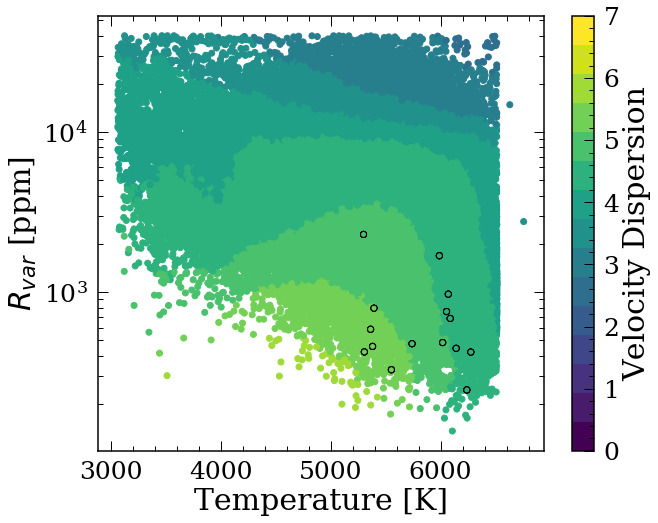

In [24]:
plt.figure(figsize=(10,8))
cm = plt.cm.get_cmap('viridis',15)
plt.scatter(df_bin_MS['teff_calc'],df_bin_MS['Rvar'],c=df_bin_MS['age'],cmap=cm,vmin=0,vmax=7)
plt.scatter(Clusters_cm['teff_calc'],Clusters_cm['Rvar'],c=Clusters_cm['age'],cmap=cm,vmin=0,vmax=7,edgecolor='k')
cb=plt.colorbar()
#plt.ylim([0,50000])
cb.set_label('Velocity Dispersion')
plt.yscale('log')
plt.xlabel('Temperature [K]')
plt.ylabel('$R_{var}$ [ppm]')


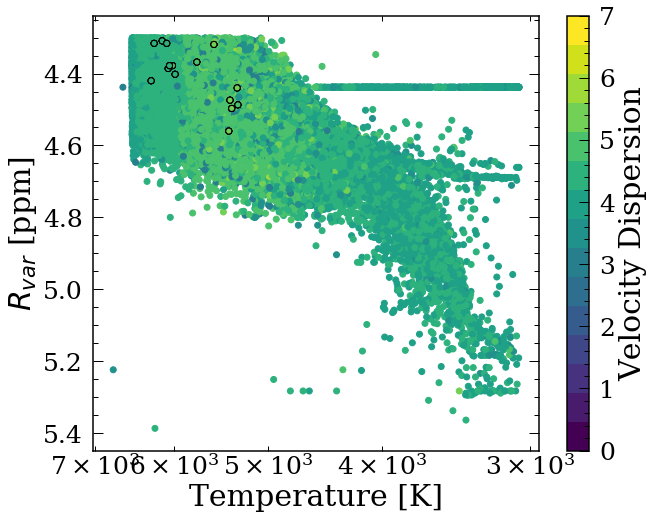

In [25]:
plt.figure(figsize=(10,8))
cm = plt.cm.get_cmap('viridis',15)
plt.scatter(df_bin_MS['teff_calc'],df_bin_MS['logg'],c=df_bin_MS['age'],cmap=cm,vmin=0,vmax=7)
plt.scatter(Clusters_cm['teff_calc'],Clusters_cm['logg'],c=Clusters_cm['age'],cmap=cm,vmin=0,vmax=7,edgecolor='k')
cb=plt.colorbar()
#plt.ylim([0,50000])
cb.set_label('Velocity Dispersion')
plt.xlabel('Temperature [K]')
plt.ylabel('$R_{var}$ [ppm]')
plt.xscale('log')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()




4.49862292441371


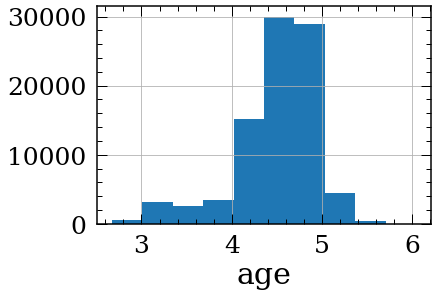

In [26]:
df_bin_MS['age'].hist()
plt.xlabel('age')
print(np.mean(df_bin_MS['age']))

[  7.46499328 -30.79559863]
[  8.35469203 -34.98855224]
[  8.30634078 -34.94835252]
[  8.3088919  -35.11885242]
[  7.76084297 -32.46771534]
[  8.50912827 -35.51719806]


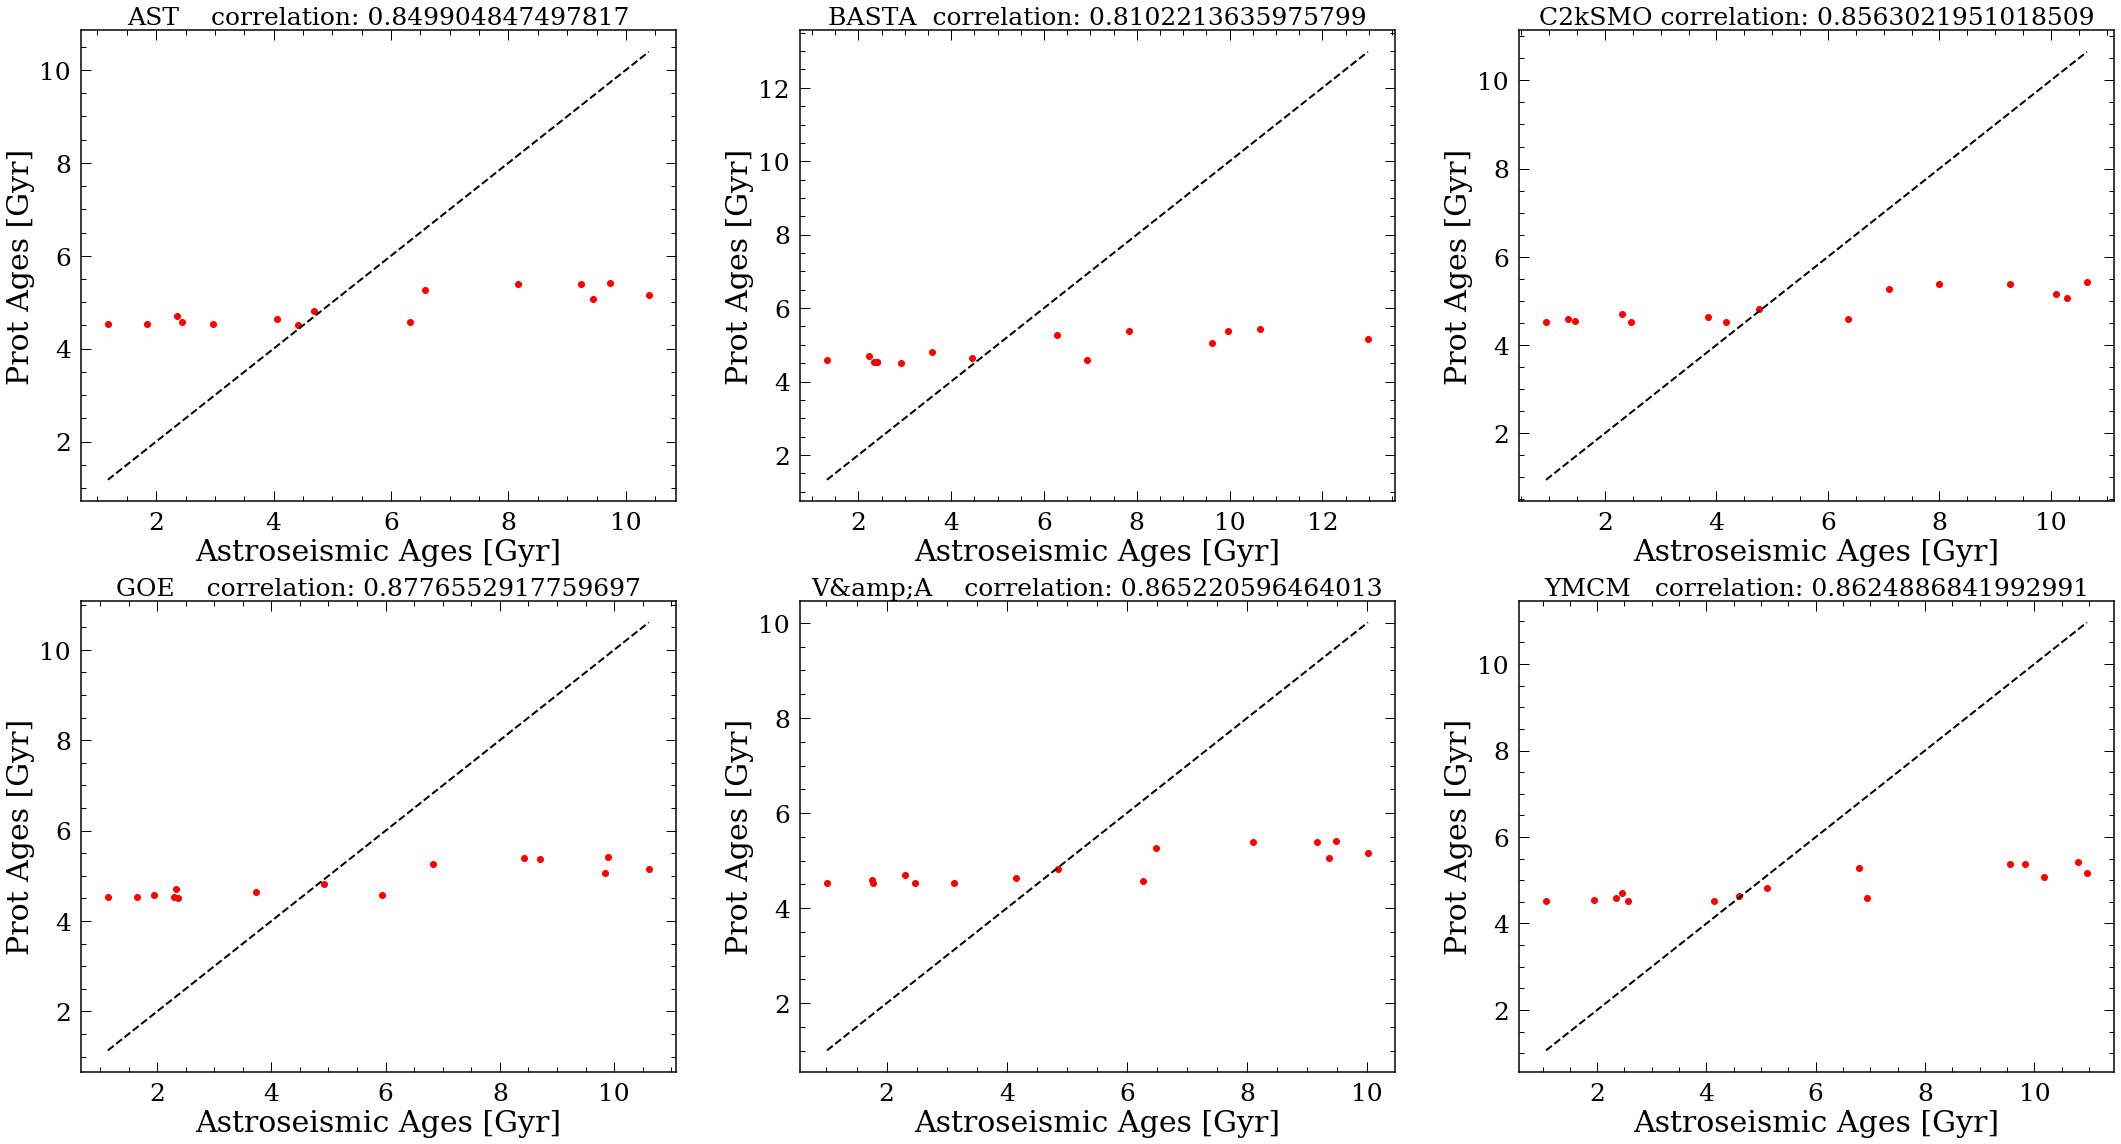

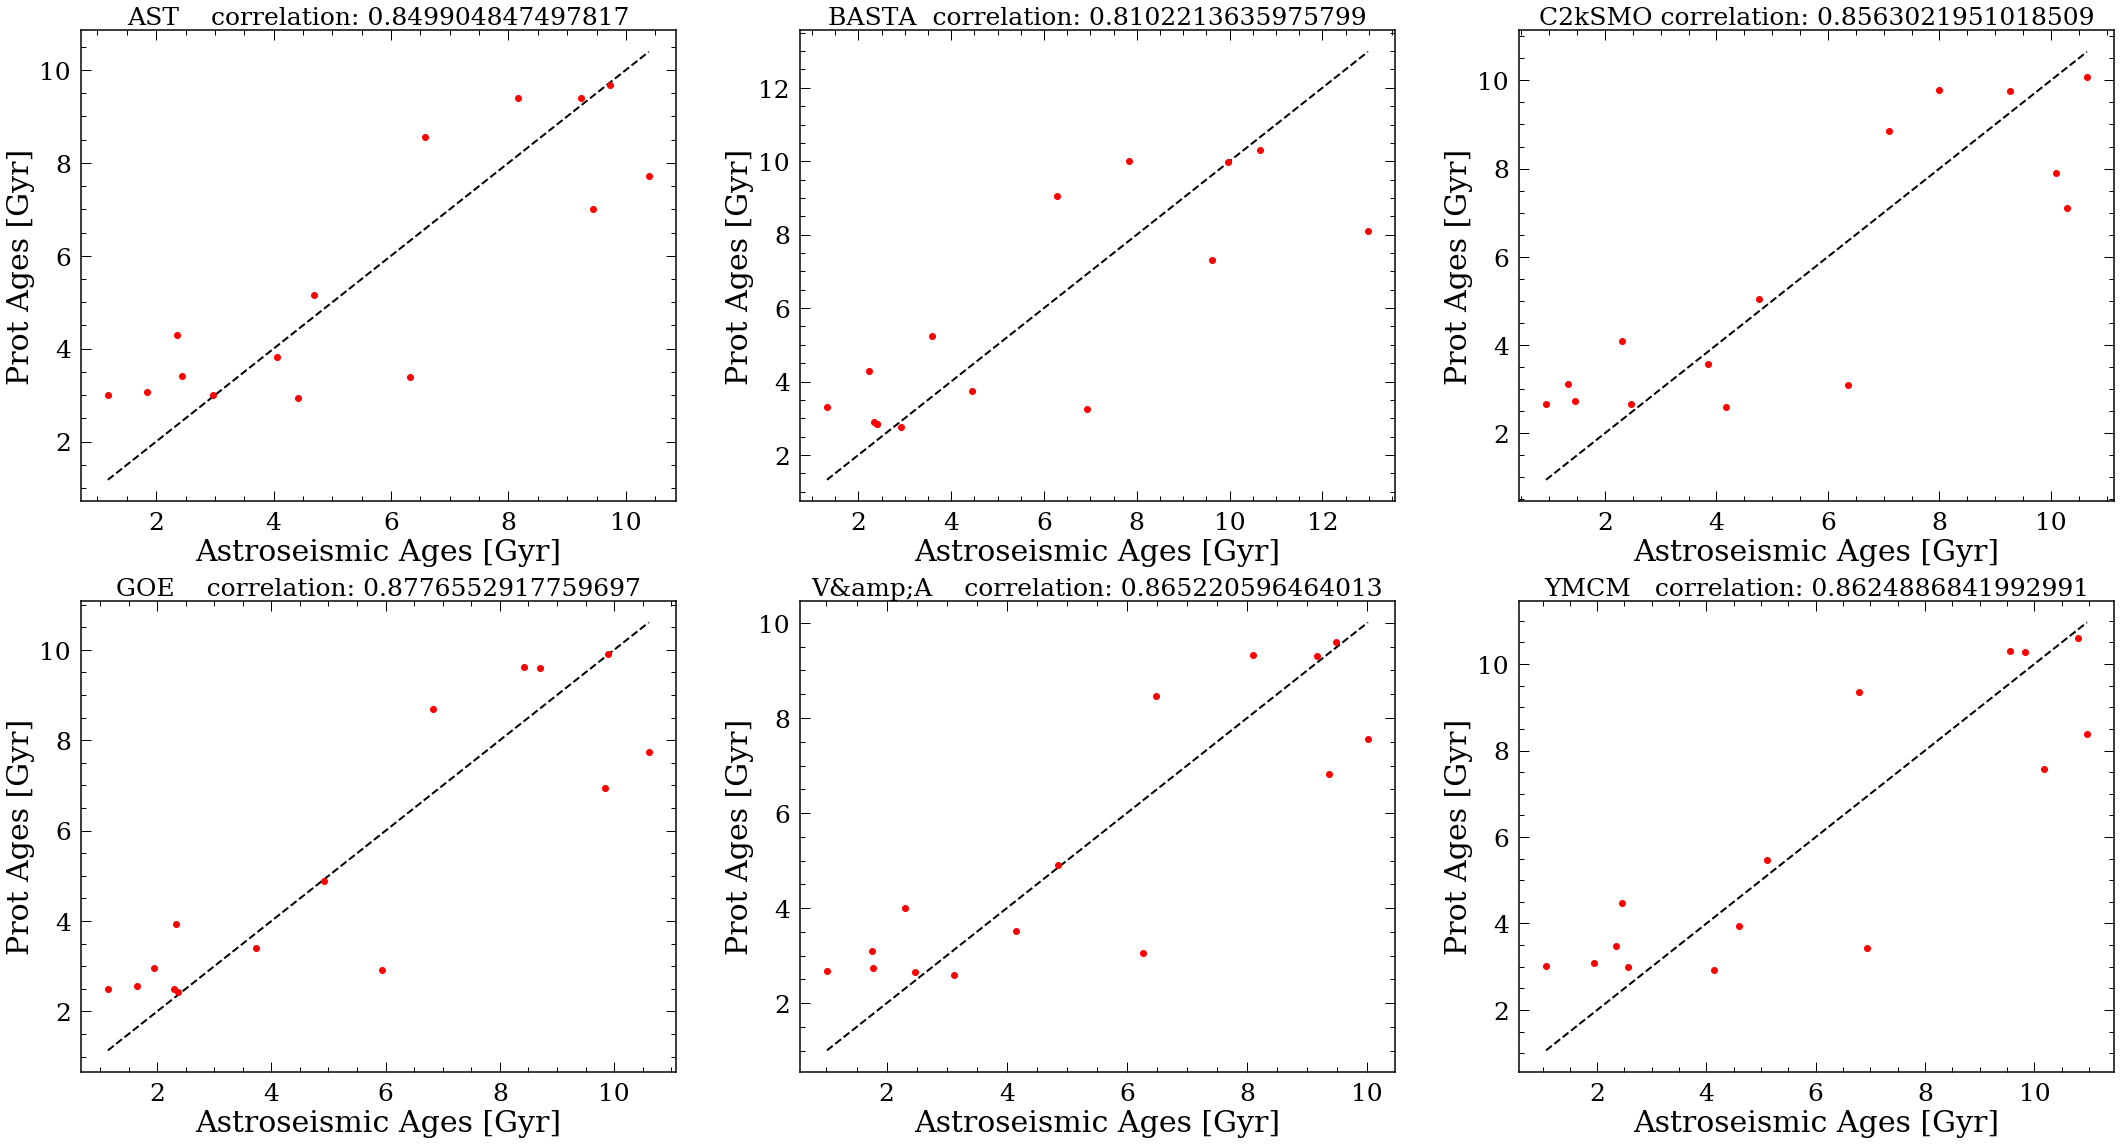

In [33]:
plt.figure(figsize=(30,16))
pcount=1
for pip in Clusters_cm['Pipe'].unique():
    plt.subplot(2,3,pcount)
    plotCM=Clusters_cm.loc[Clusters_cm['Pipe']==pip]
    plt.plot(plotCM["Age"],plotCM["age"],'ro')
    plt.plot([min(plotCM["Age"]),max(plotCM["Age"])],[min(plotCM["Age"]),max(plotCM["Age"])],'k--')
    
    plt.xlabel('Astroseismic Ages [Gyr]')
    plt.ylabel('Prot Ages [Gyr]')
    r = np.corrcoef(plotCM["Age"], plotCM["age"])
    plt.title(pip+' correlation: '+str(r[1][0]),fontsize=25)
    pcount=pcount+1
plt.tight_layout()

plt.figure(figsize=(30,16))
pcount=1
for pip in Clusters_cm['Pipe'].unique():
    plt.subplot(2,3,pcount)
    plotCM=Clusters_cm.loc[Clusters_cm['Pipe']==pip]
    plt.plot([min(plotCM["Age"]),max(plotCM["Age"])],[min(plotCM["Age"]),max(plotCM["Age"])],'k--')
    z=np.polyfit(plotCM["age"],plotCM["Age"],1)
    print(z)
    plt.plot(plotCM["Age"],np.polyval(z,plotCM["age"]),'ro')
    
    plt.xlabel('Astroseismic Ages [Gyr]')
    plt.ylabel('Prot Ages [Gyr]')
    r = np.corrcoef(plotCM["Age"], plotCM["age"])
    plt.title(pip+' correlation: '+str(r[1][0]),fontsize=25)
    pcount=pcount+1
plt.tight_layout()

#plt.savefig('checkage.png')

# plot against AGOGEE abundances

In [11]:
APOGEE=pd.read_pickle('/Users/lucy/Desktop/ASTR/Columbia/GalacticArch/APOGEE.pkl')


In [12]:
cols=[i for i in APOGEE.columns if '_FE' in i]
cols=[i for i in cols if '_FEH' not in i]
cols=[i for i in cols if '_ERR' not in i]
cols=[i for i in cols if '_FLAG' not in i]
cols

['C_FE',
 'CI_FE',
 'N_FE',
 'O_FE',
 'NA_FE',
 'MG_FE',
 'AL_FE',
 'SI_FE',
 'P_FE',
 'S_FE',
 'K_FE',
 'CA_FE',
 'TI_FE',
 'TIII_FE',
 'V_FE',
 'CR_FE',
 'MN_FE',
 'CO_FE',
 'NI_FE',
 'CU_FE',
 'GE_FE',
 'RB_FE',
 'CE_FE',
 'ND_FE',
 'YB_FE']

In [13]:
#df_NN_MS=pd.merge(APOGEE,df_NN_MS,left_on='GAIA_SOURCE_ID',right_on='source_id',how='inner')
#df_NN_giant=pd.merge(APOGEE,df_NN_giant,left_on='GAIA_SOURCE_ID',right_on='source_id',how='inner')

df_bin_MS=pd.merge(APOGEE,df_bin_MS,left_on='GAIA_SOURCE_ID',right_on='source_id',how='inner')
#df_bin_giant=pd.merge(APOGEE,df_bin_giant,left_on='GAIA_SOURCE_ID',right_on='source_id',how='inner')

#df_NN_MS=df_NN_MS.loc[df_NN_MS['FE_H']>-5000]
df_bin_MS=df_bin_MS.loc[df_bin_MS['FE_H']>-5000]

abund=['C_FE','O_FE','NA_FE','MG_FE','AL_FE','SI_FE','S_FE','CA_FE','SC_FE','TI_FE',
      'V_FE','CR_FE','MN_FE','CO_FE','NI_FE','CU_FE','ZN_FE','SR_FE','Y_FE','ZR_FE',
      'BA_FE','LA_FE','CE_FE','PR_FE','ND_FE','SM_FE','EU_FE','GD_FE','DY_FE']

In [14]:
#print(len(df_NN_MS),len(df_NN_giant),len(df_bin_MS),len(df_bin_giant))

-0.055513896048069


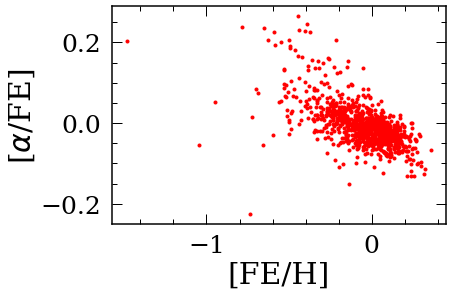

In [15]:
# alpha/Fe
plt.plot(figsize=(10,8))
plt.plot(df_bin_MS['FE_H'],df_bin_MS['ALPHA_M'],'r.')
plt.ylabel('[$\\alpha$/FE]')
plt.xlabel('[FE/H]')
print(np.mean(df_bin_MS['FE_H']))

1061


/Users/lucy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


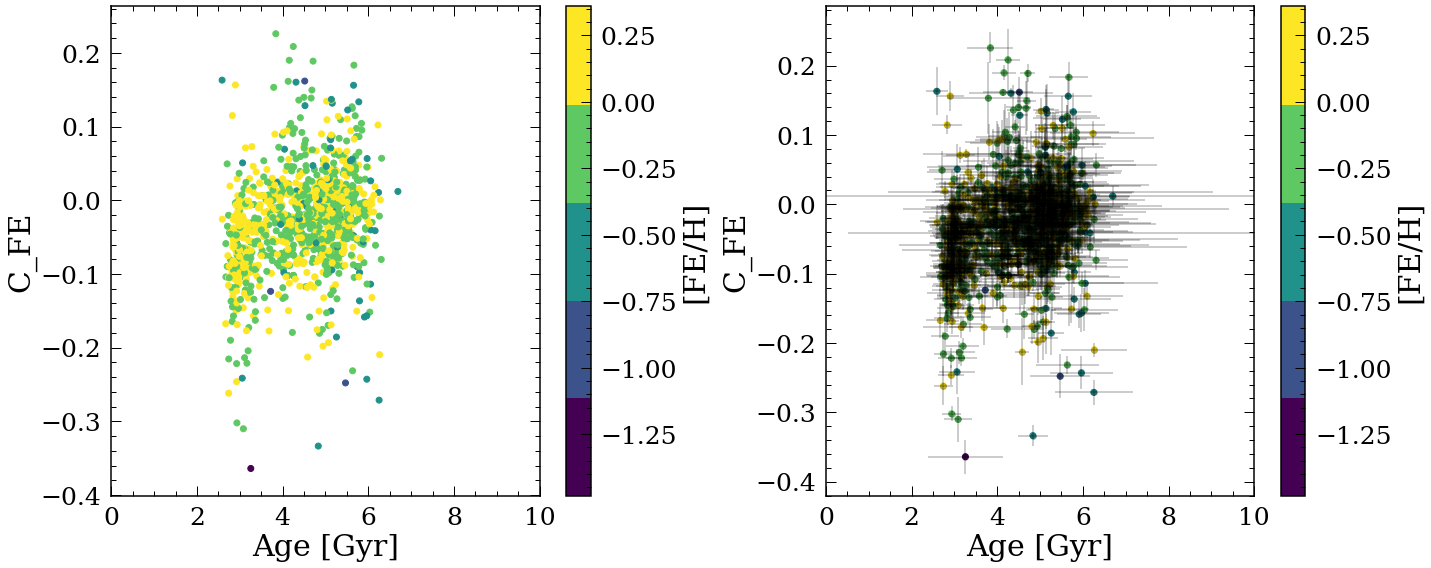

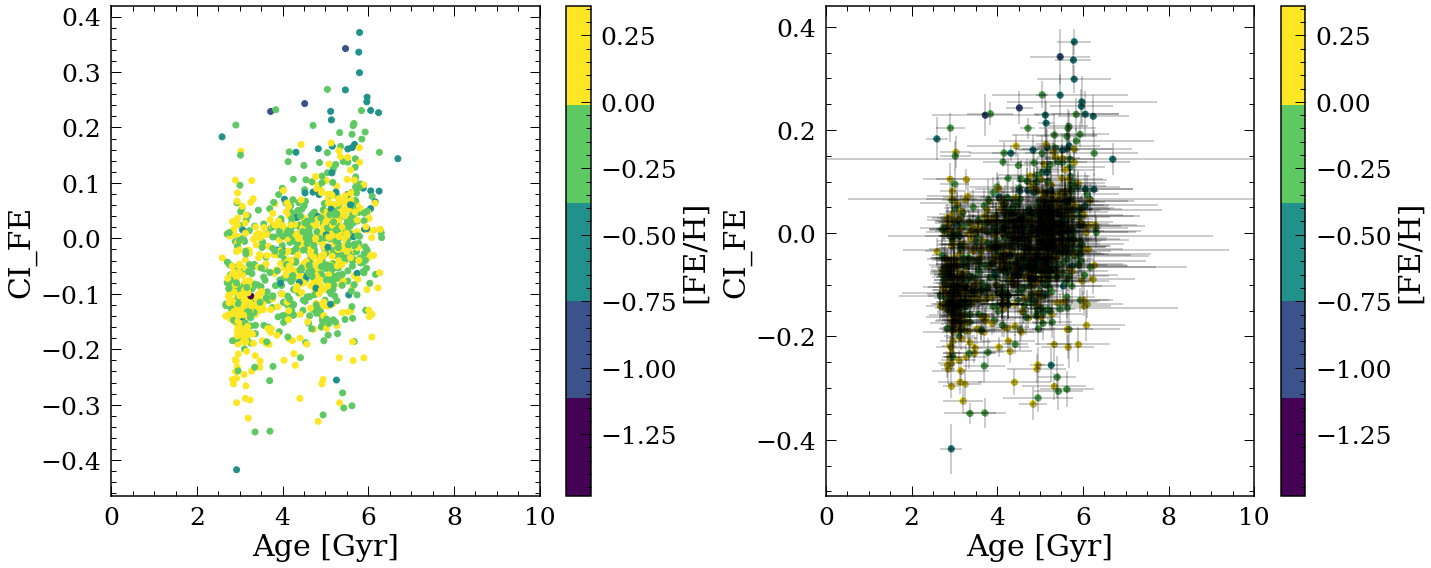

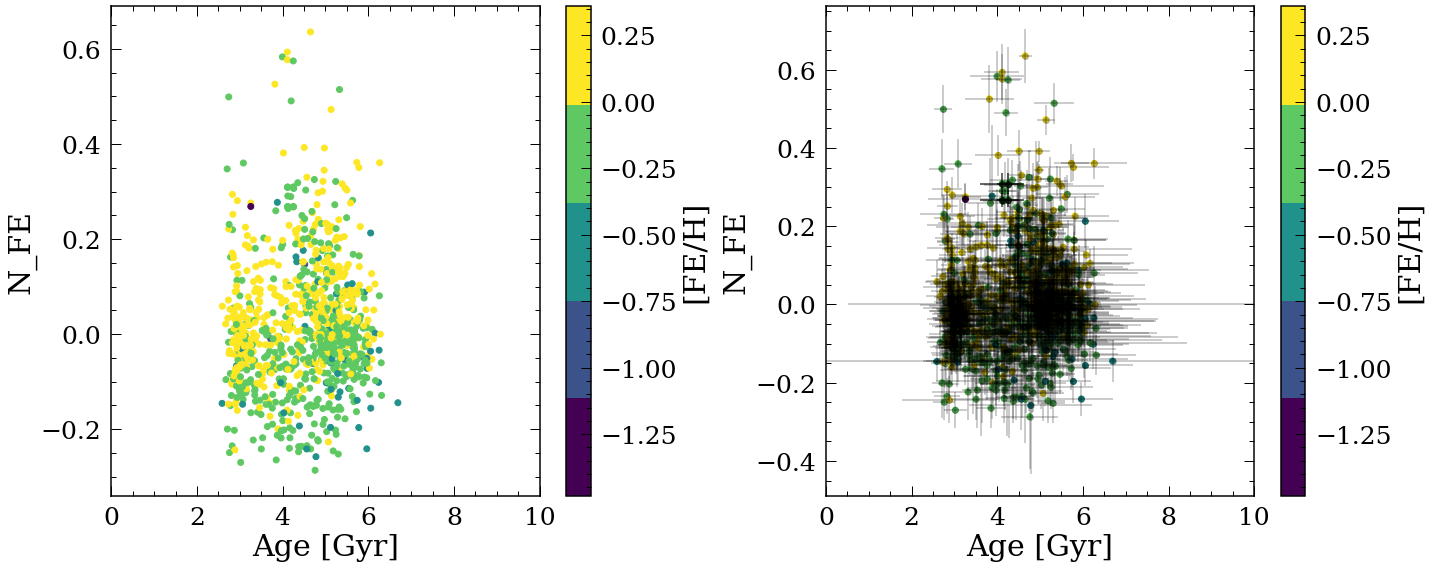

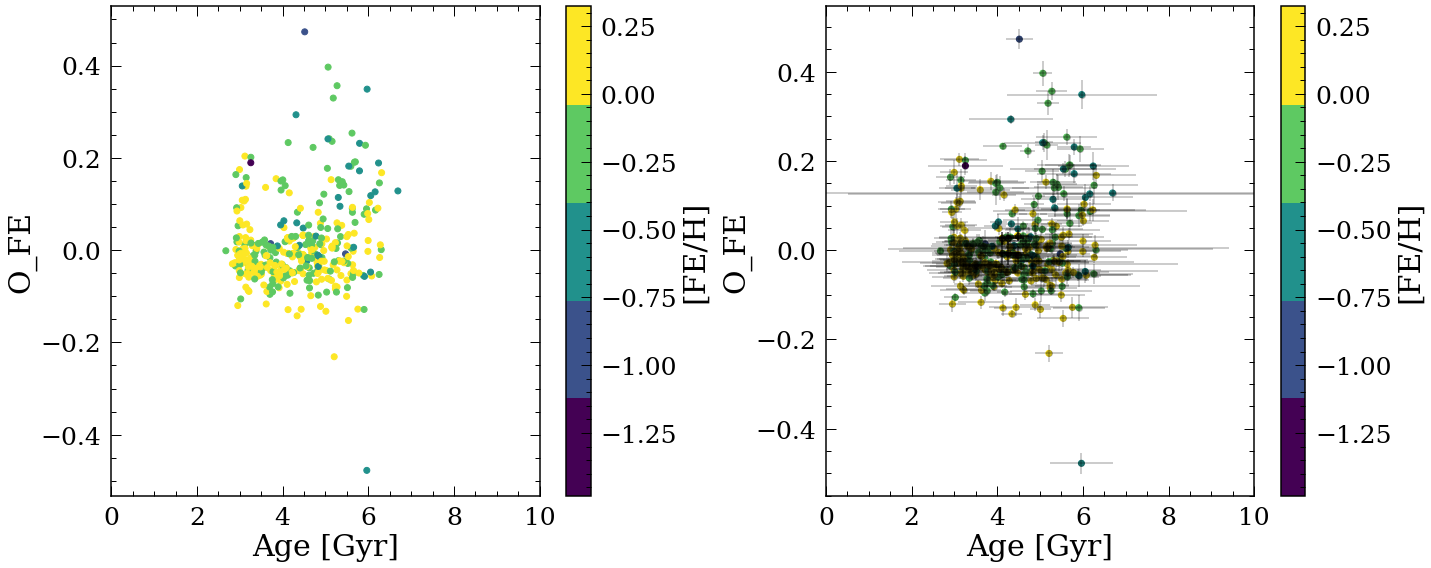

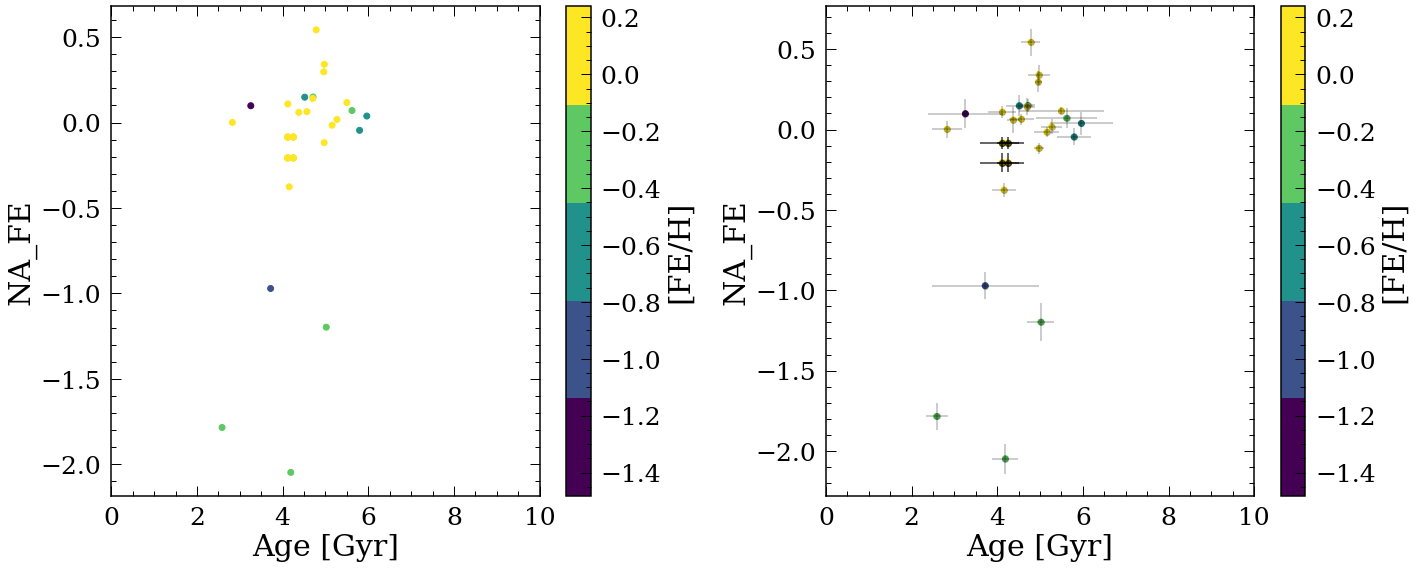

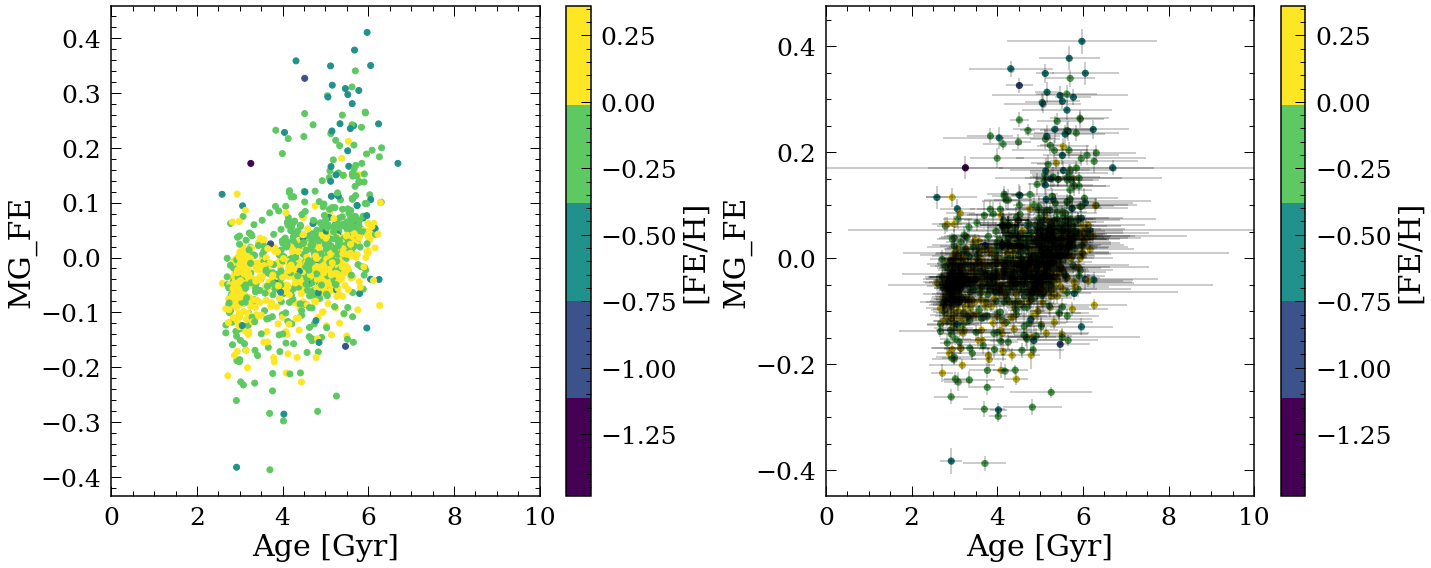

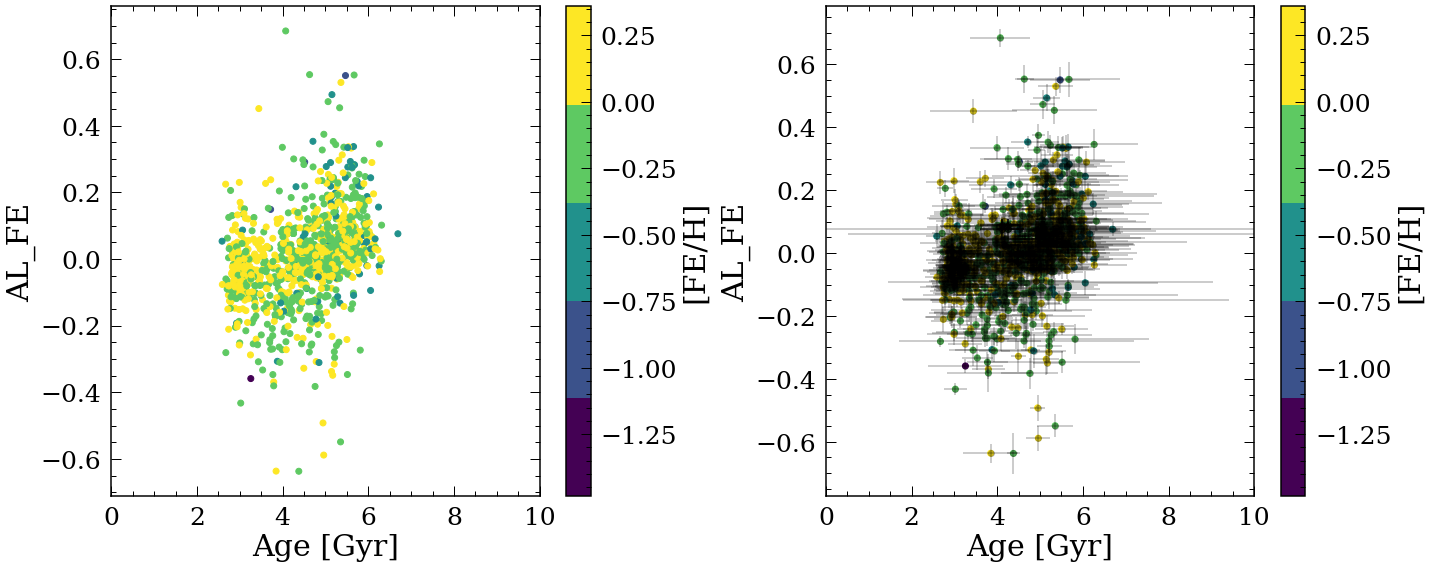

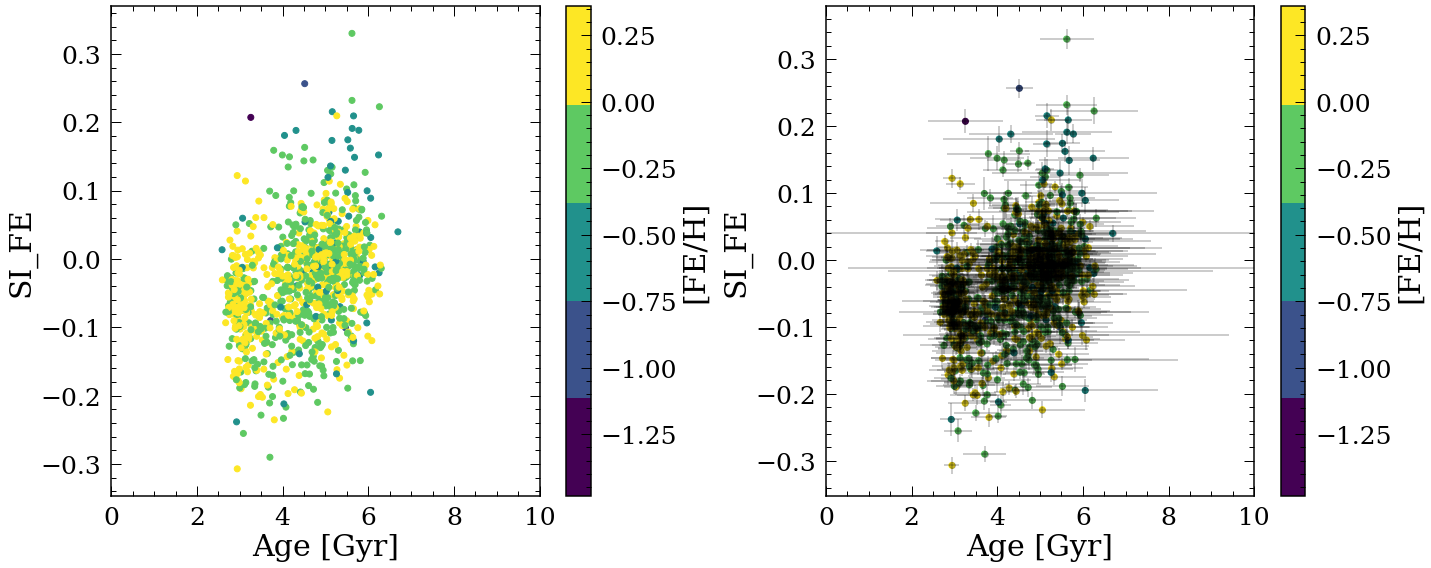

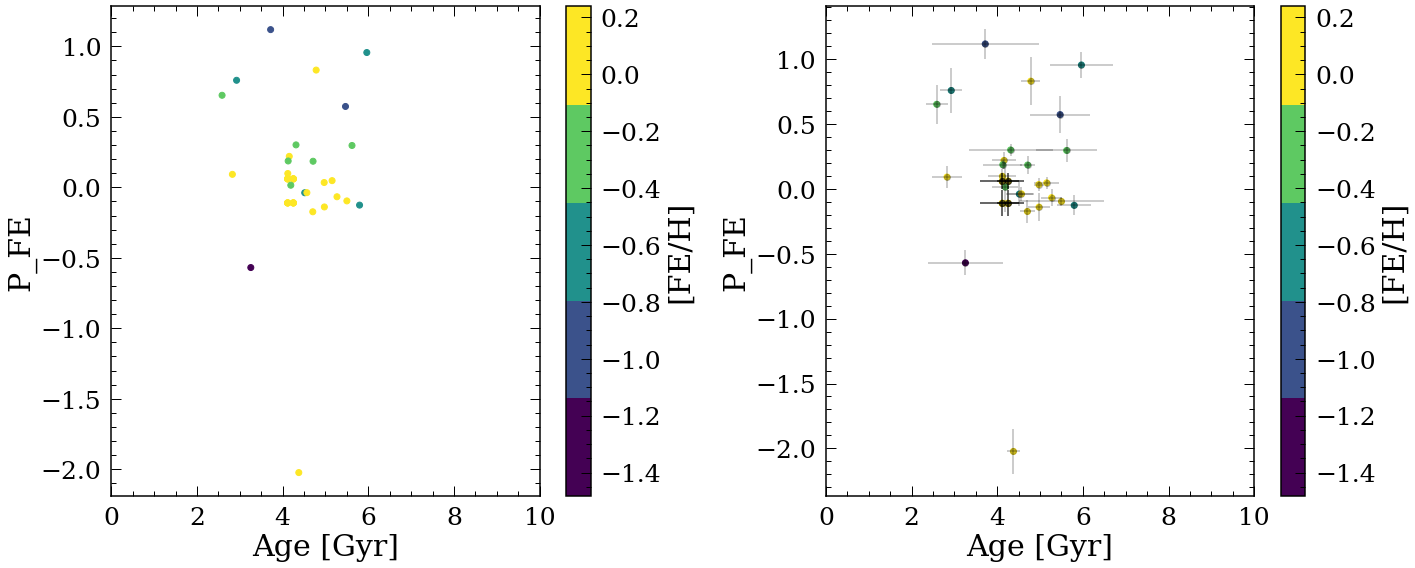

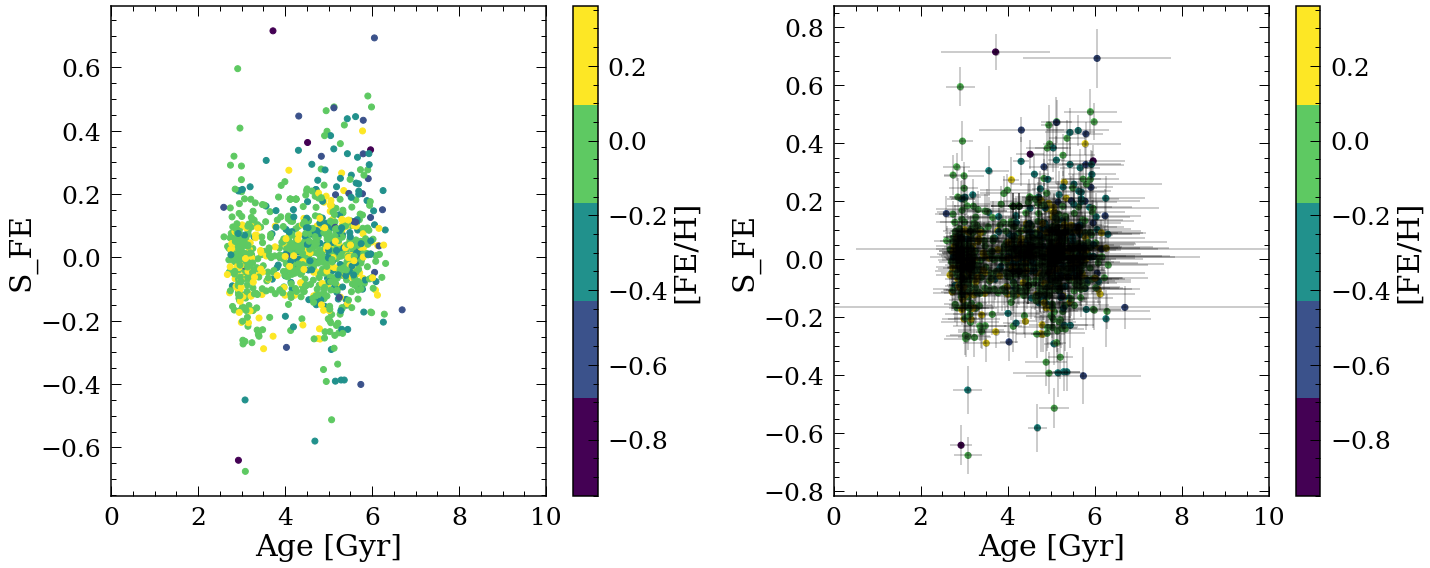

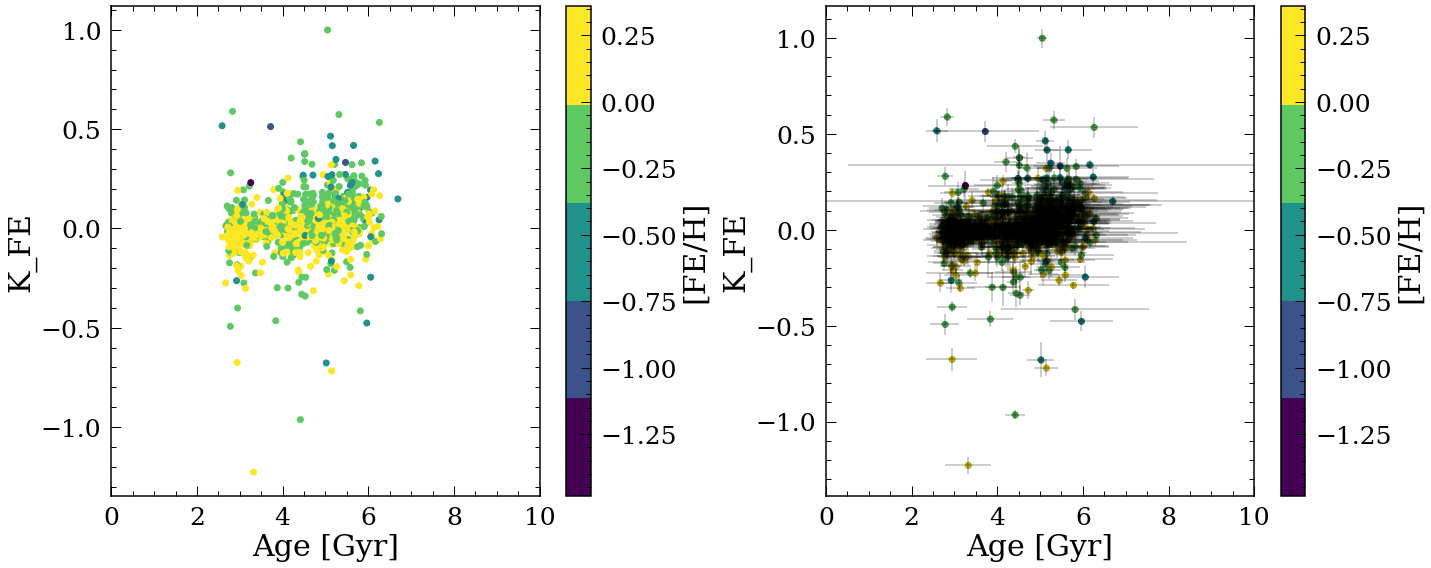

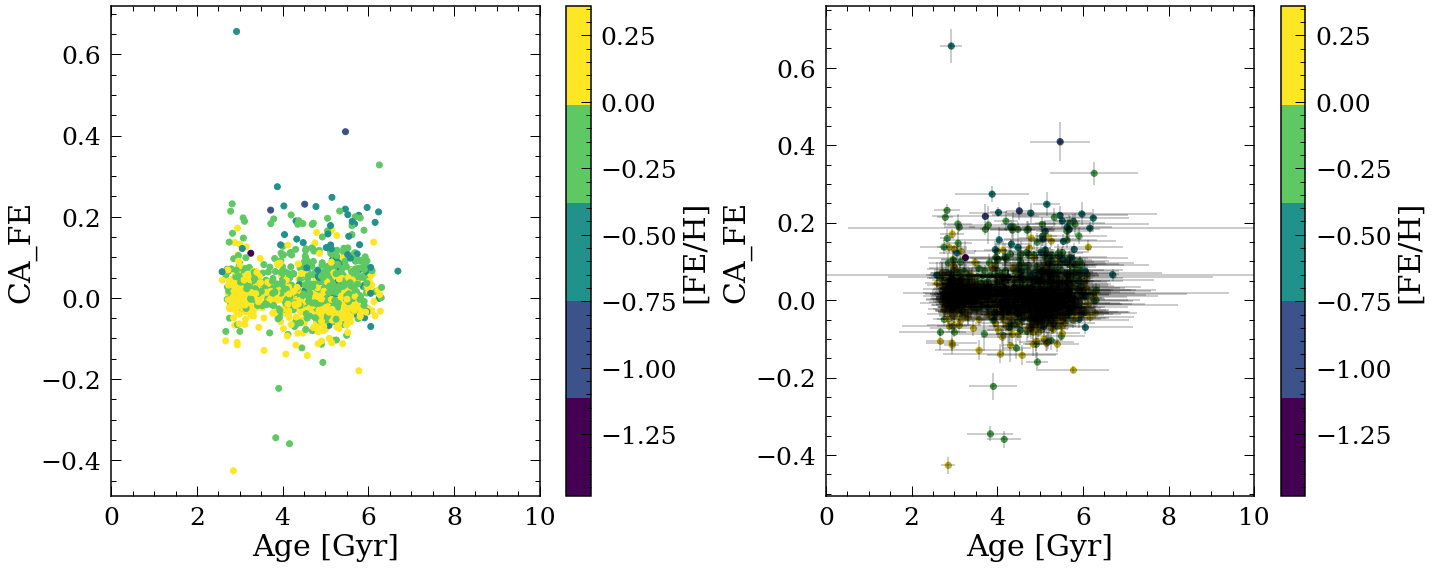

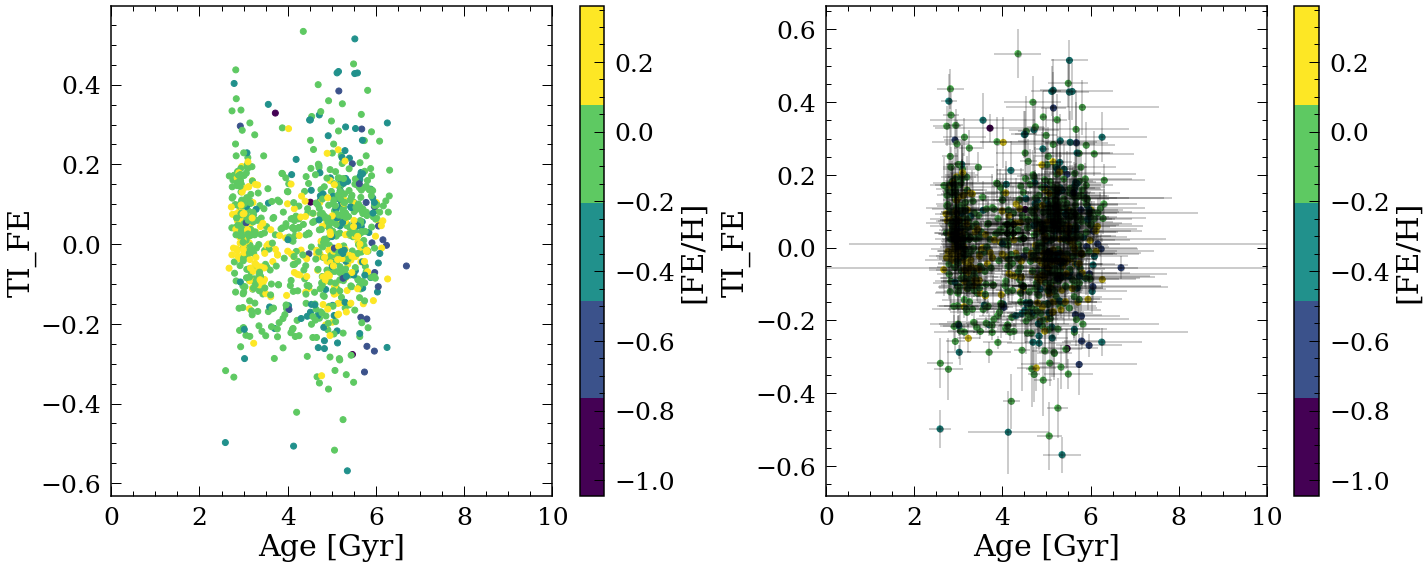

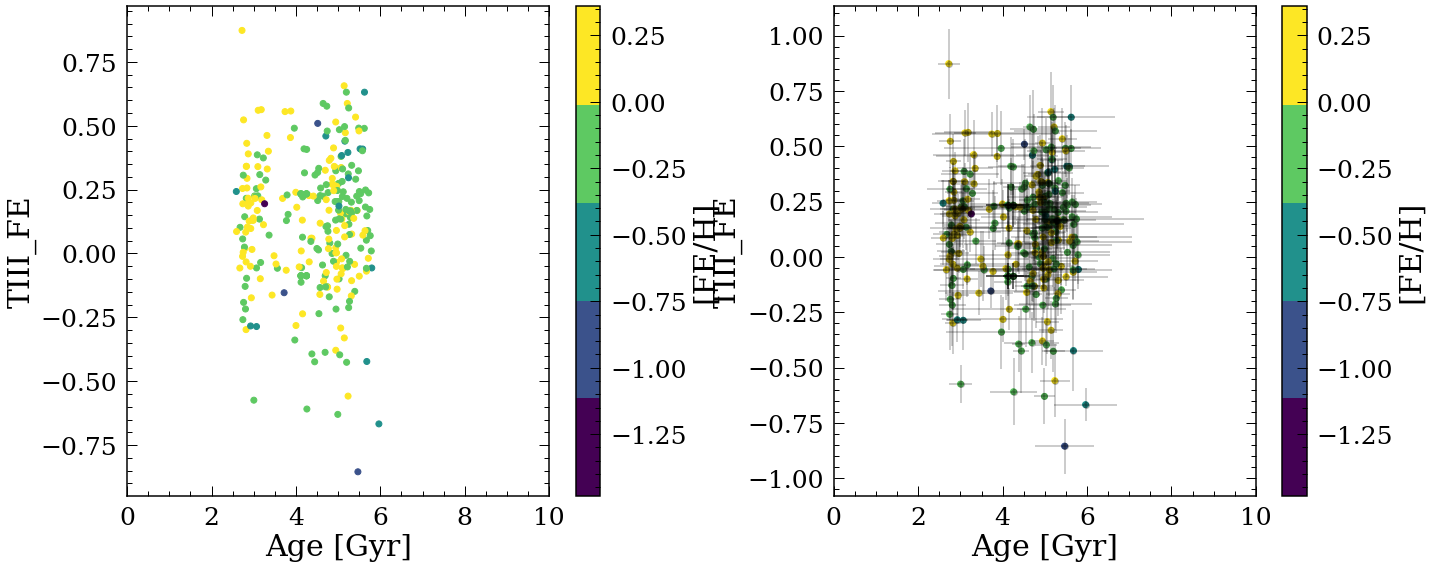

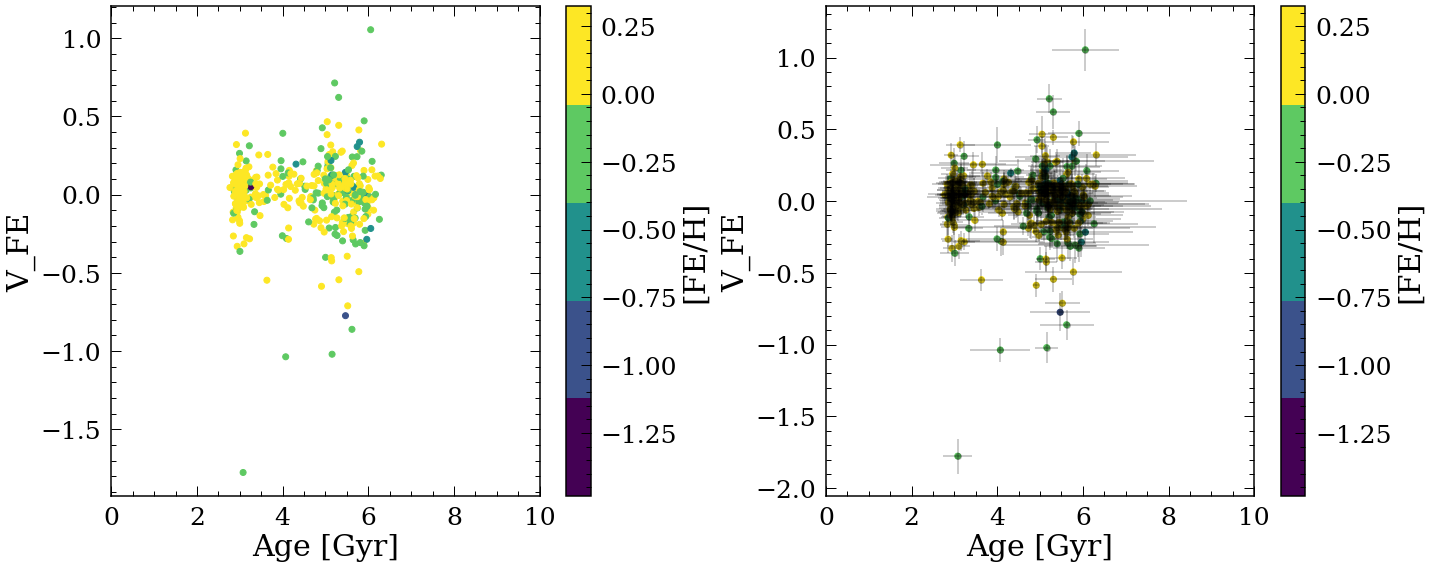

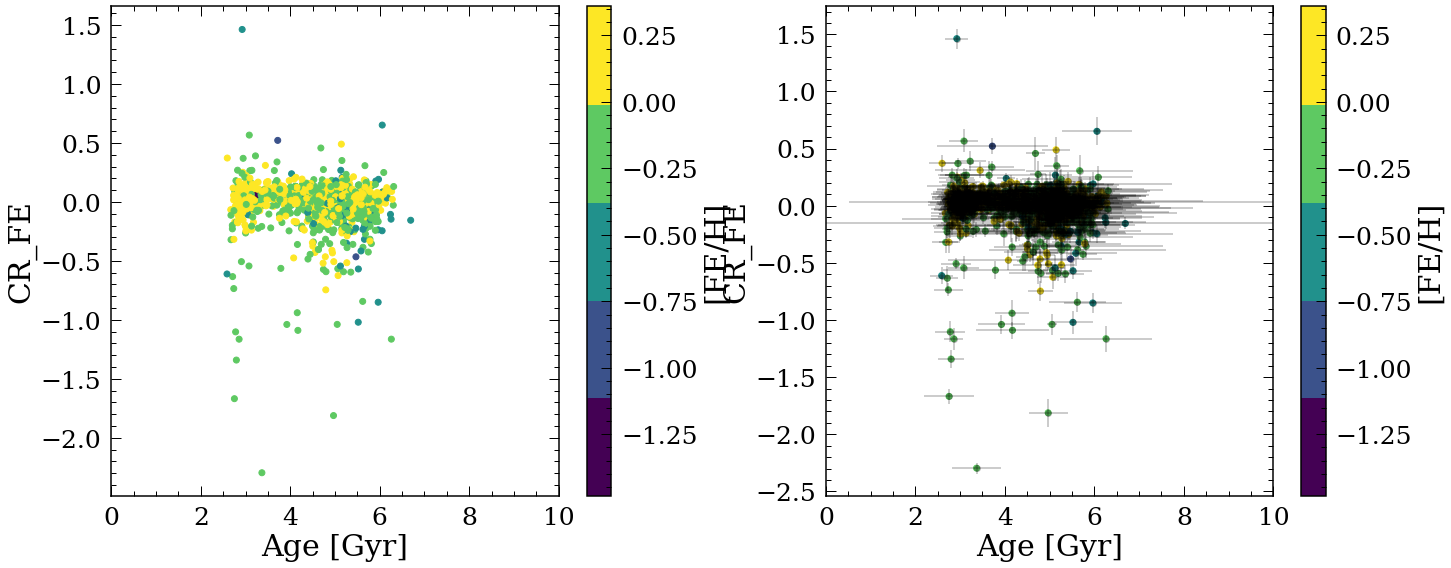

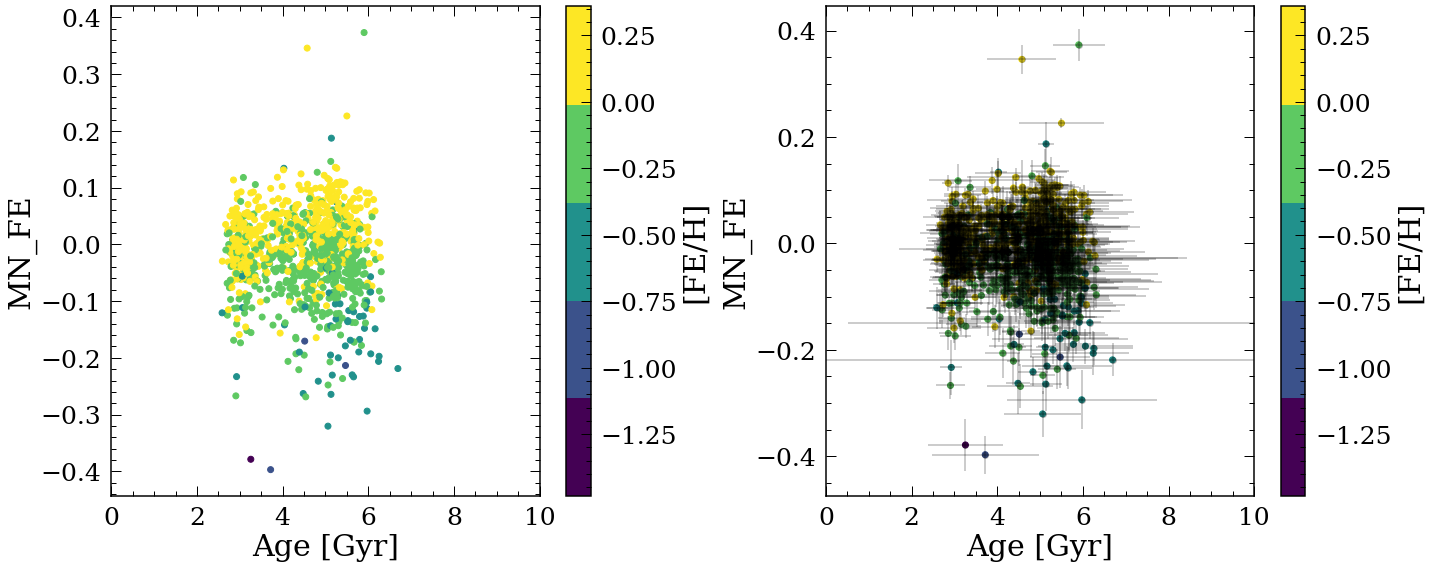

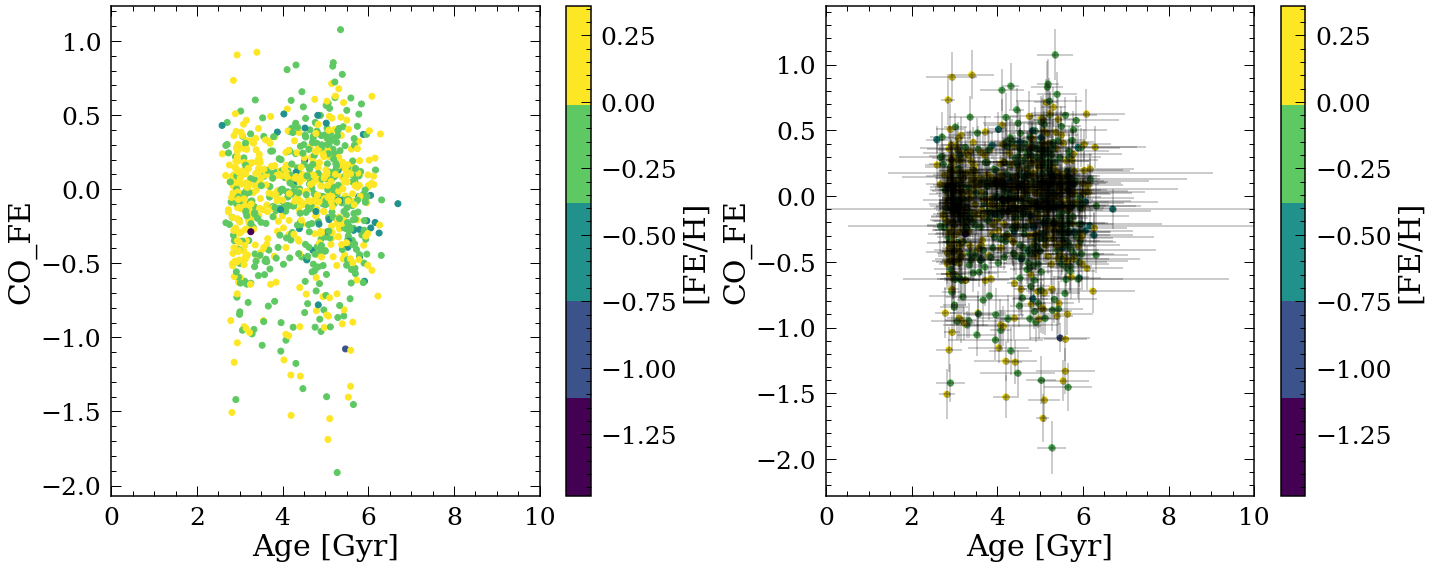

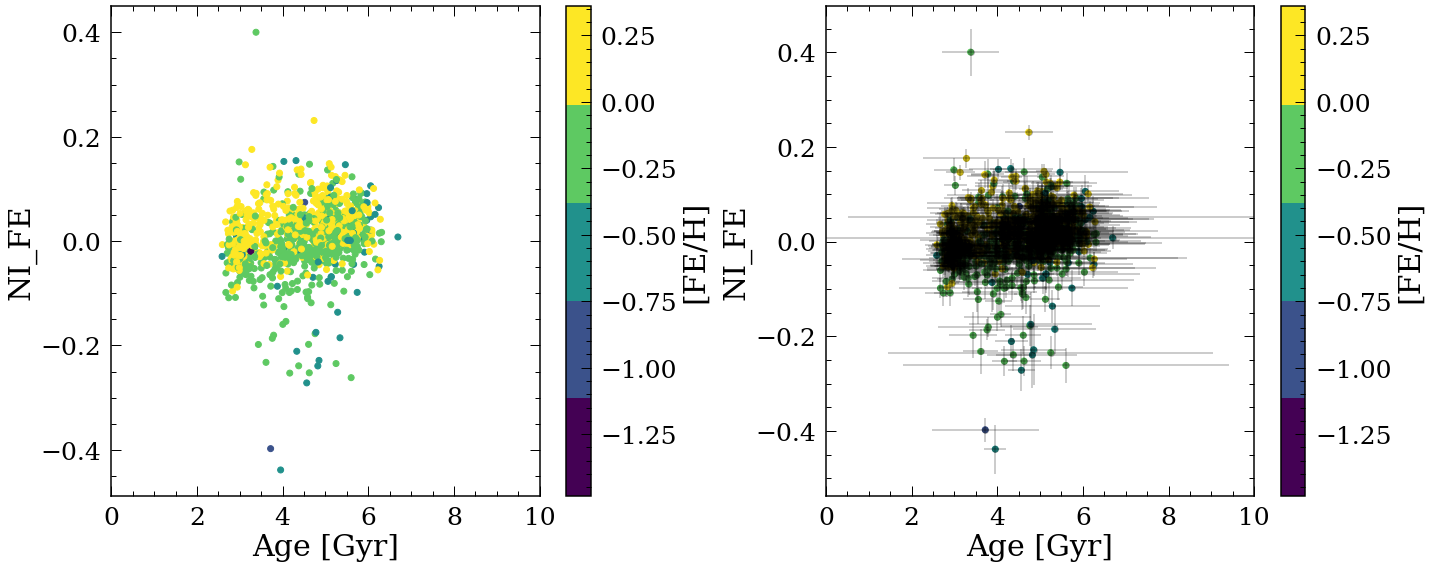

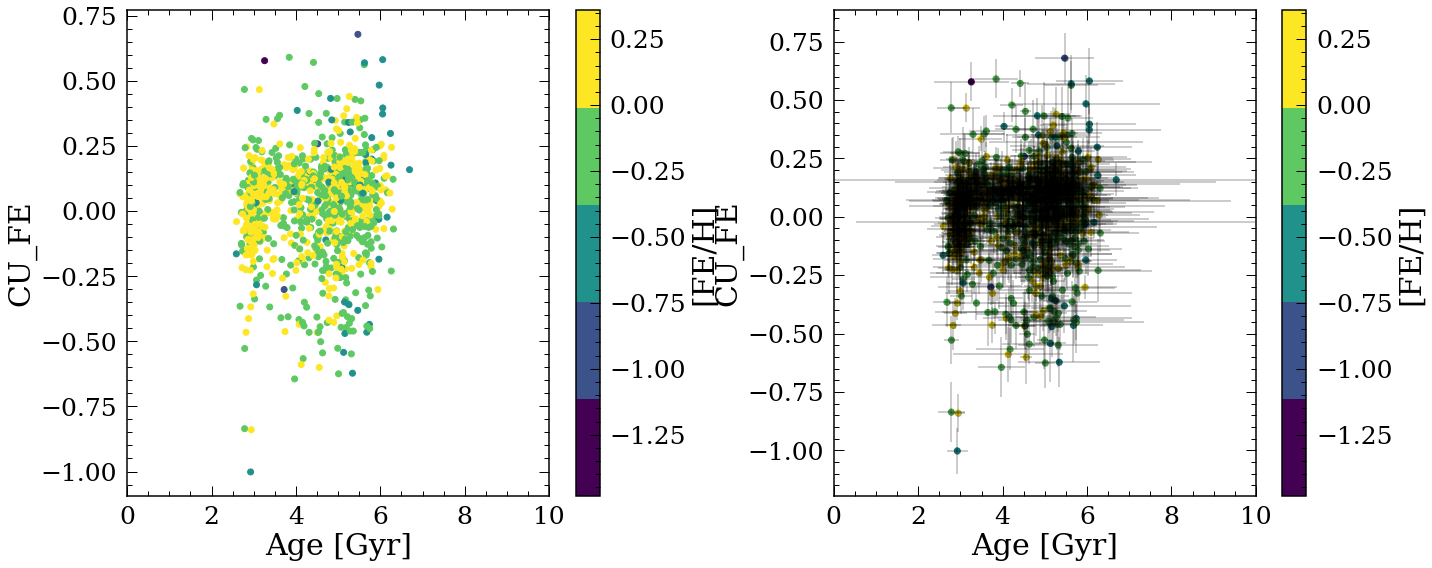

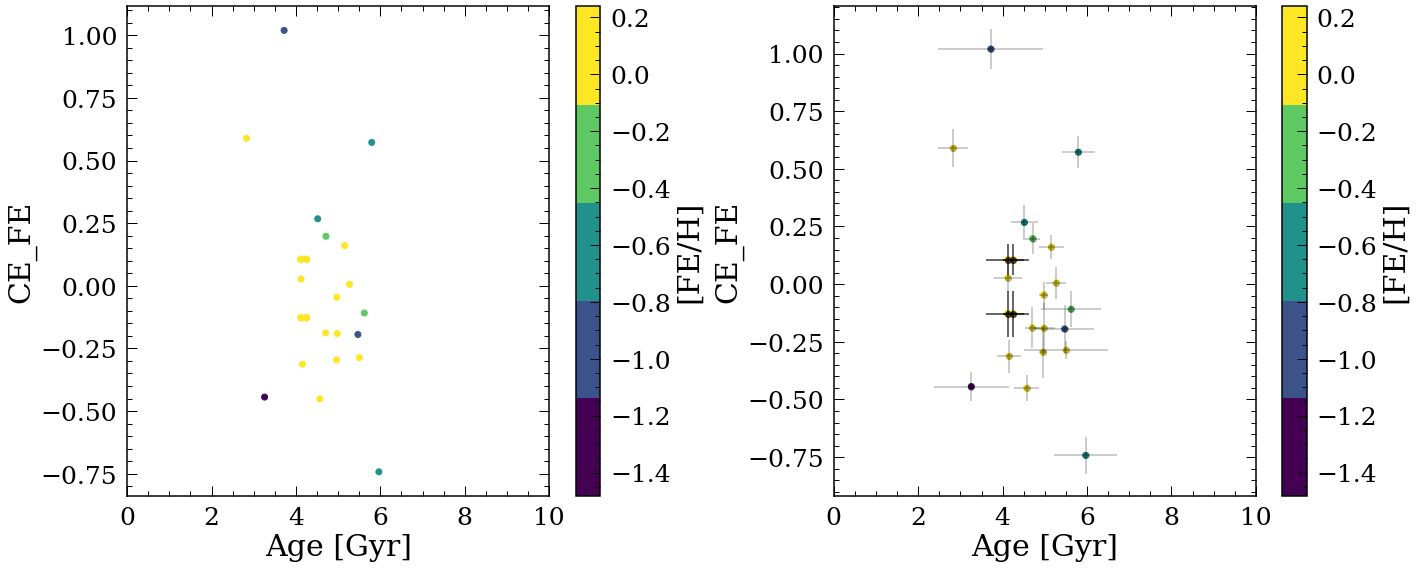

In [18]:
cm = plt.cm.get_cmap('viridis',5)
print(len(df_bin_MS))
for i in range(len(cols)):
    checkabd=cols[i]
    df_plot=df_bin_MS.loc[df_bin_MS[checkabd]>-100]
    if len(df_plot)>10:
        plt.figure(figsize=(20,8))
        plt.subplot(1,2,1)
        plt.scatter(df_plot['age'],df_plot[checkabd],c=df_plot['FE_H'],cmap=cm)
        plt.ylabel(checkabd)
        plt.xlim([0,10])
        plt.xlabel('Age [Gyr]')
        cb=plt.colorbar()
        cb.set_label('[FE/H]')
        
        plt.subplot(1,2,2)
        plt.errorbar(df_plot['age_MAD'],df_plot[checkabd],
                 yerr=df_plot[checkabd+"_ERR"],xerr=df_plot["age_MAD_err"],fmt='ko',alpha=0.2)
        plt.scatter(df_plot['age'],df_plot[checkabd],c=df_plot['FE_H'],cmap=cm)
        plt.ylabel(checkabd)
        plt.xlim([0,10])
        plt.xlabel('Age [Gyr]')
        cb=plt.colorbar()
        cb.set_label('[FE/H]')
        
        plt.tight_layout()
        plt.savefig('NewData/Abund/'+checkabd+'_MS.png')
        #plt.xlim([-0.5,0.5])

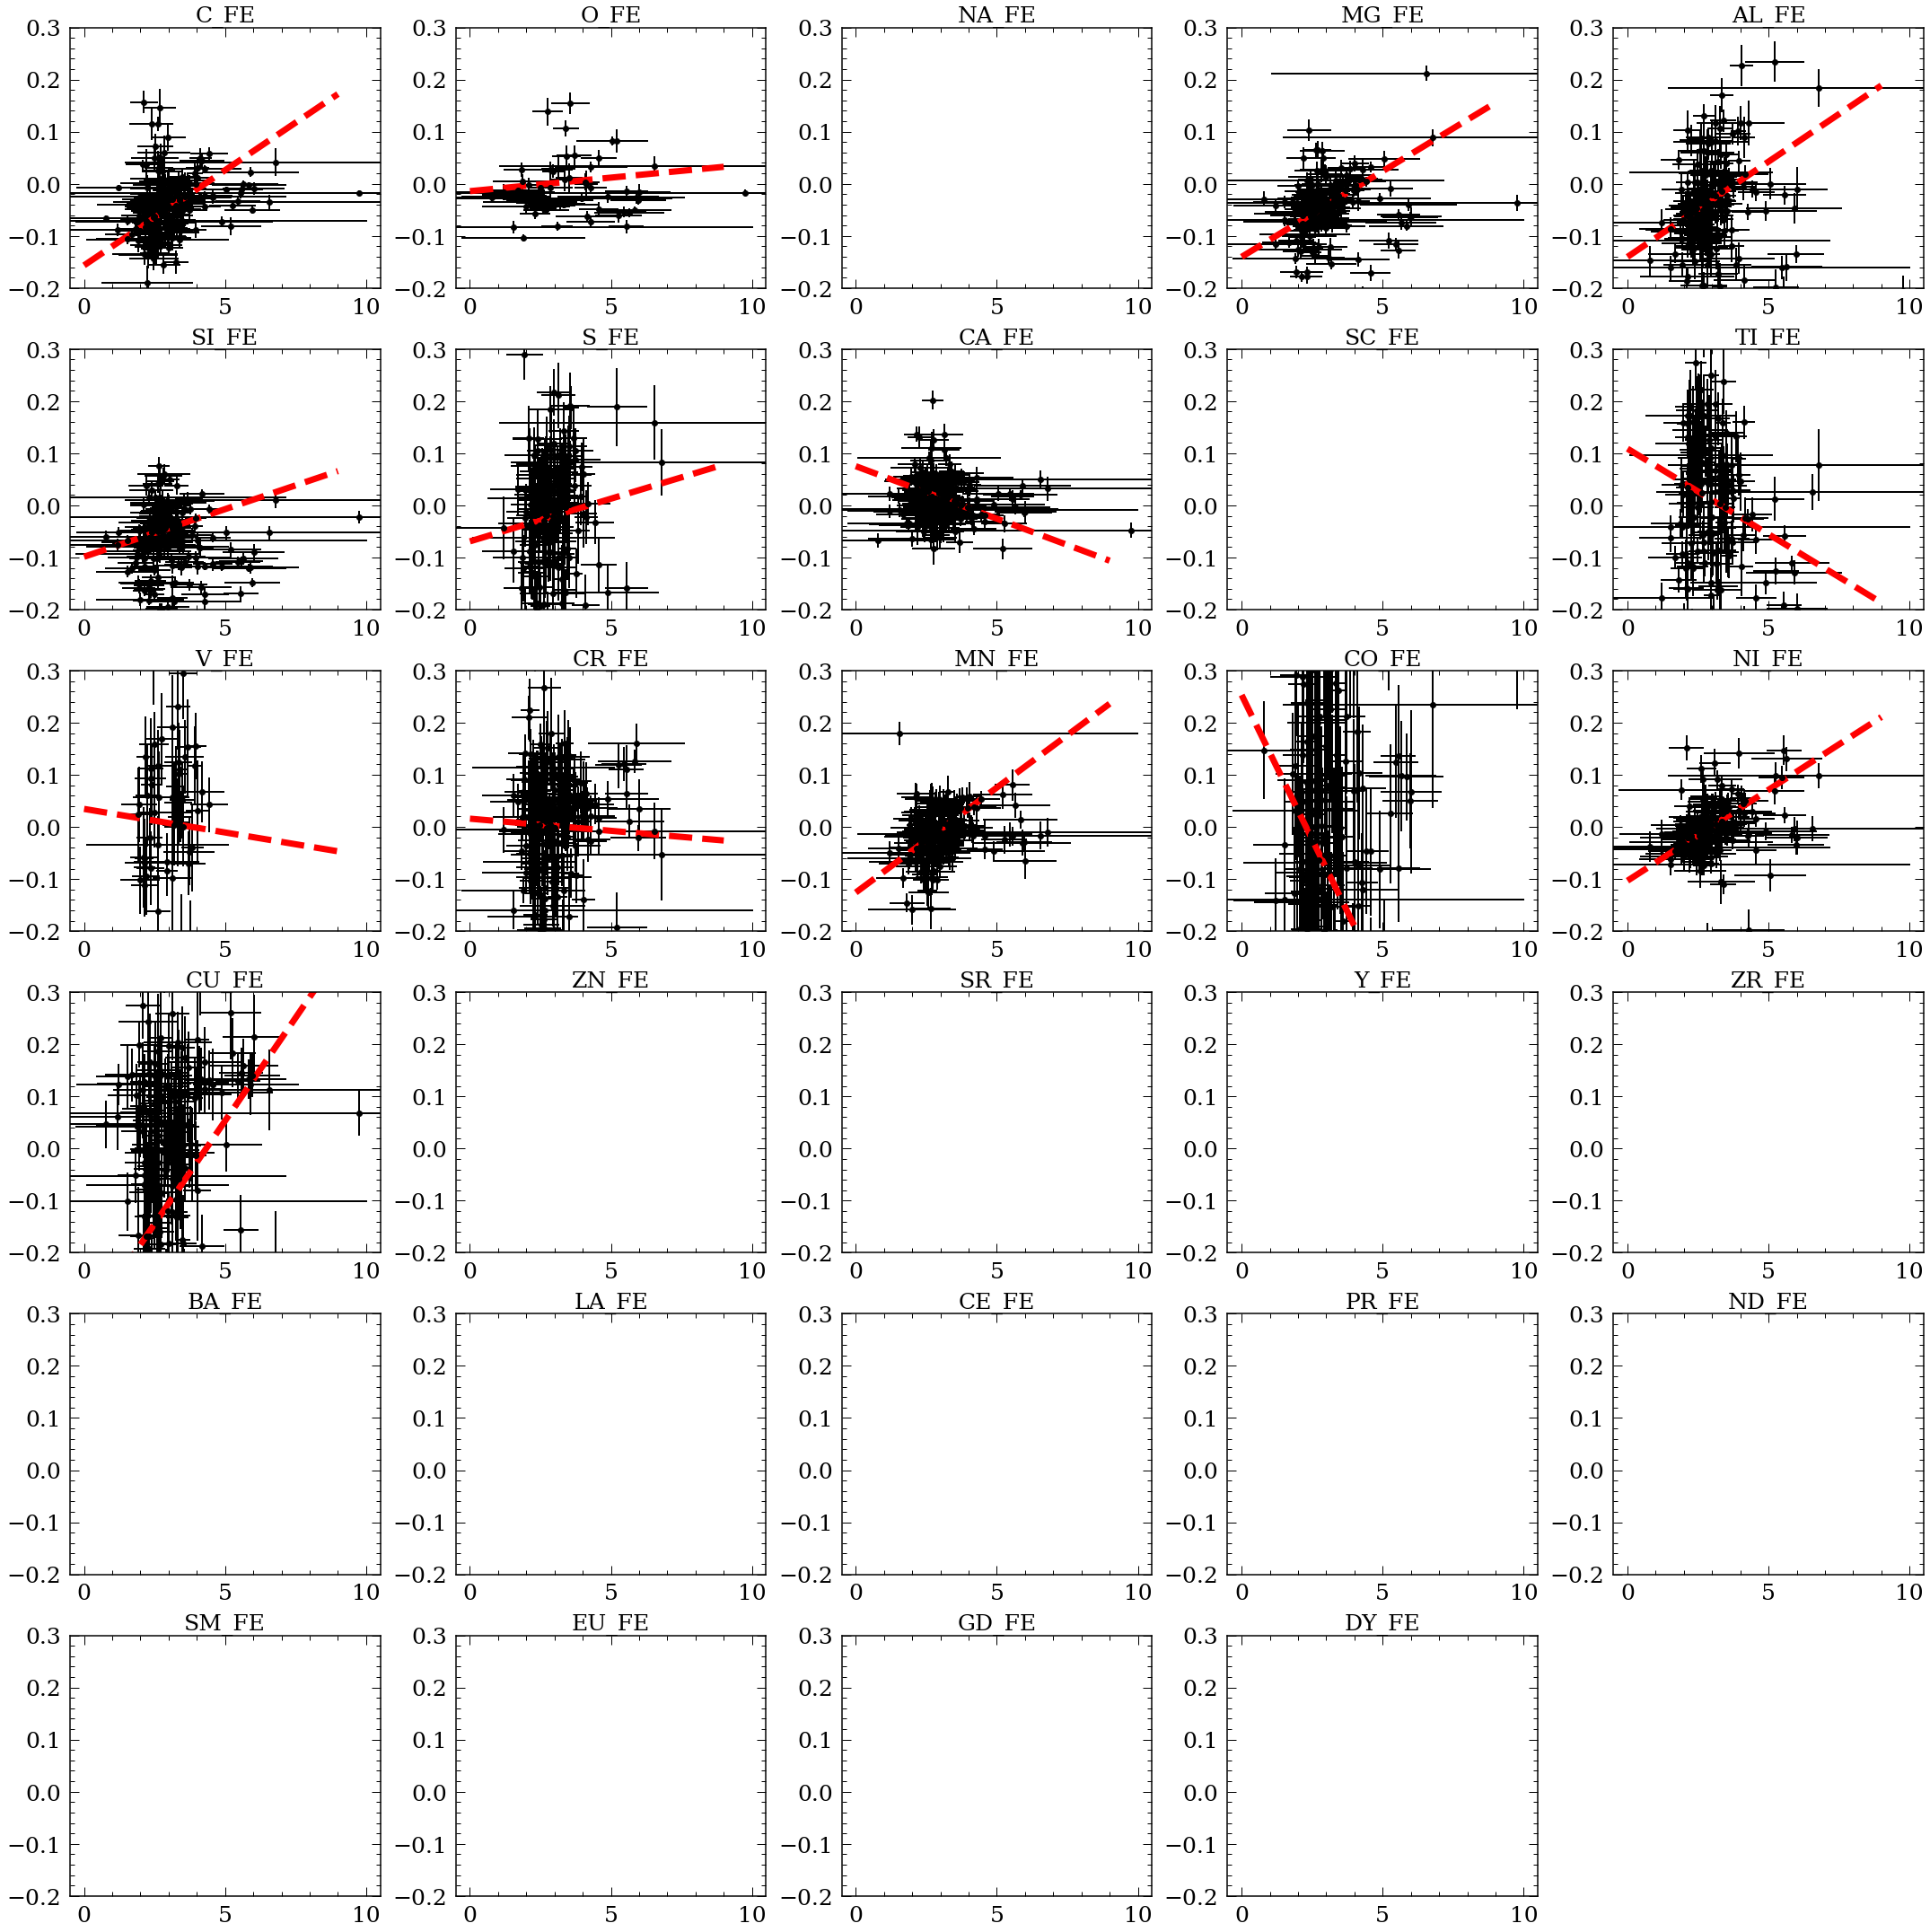

In [25]:
plt.figure(figsize=(30,30))
df_st=df_bin_MS.loc[abs(df_bin_MS['FE_H'])<=0.1]
#df_st=df_st.loc[abs(df_st['teff_calc']-5778)<=100]
#df_st=df_st.loc[abs(df_st['LOGG']-4.43)<=0.1]

for i in range(len(abund)):
    plt.subplot(6,5,i+1)
    if abund[i] in cols:
        df_plot=df_st.loc[df_st[abund[i]]>-100]
        
        if len(df_plot)>10:
        
            z = np.polyfit(df_plot['age_MAD'], df_plot[abund[i]], 
                           1,w=(1./(np.power(df_plot[abund[i]+"_ERR"],2)+np.power(df_plot['age_MAD_err'],2))))
            p = np.poly1d(z)
        
            
            plt.errorbar(df_plot['age_MAD'],df_plot[abund[i]],
                         yerr=df_plot[abund[i]+"_ERR"],xerr=df_plot["age_MAD_err"],fmt='ko')
            
            """
            plt.errorbar(df_plot['age_MAD'],df_plot[abund[i]],
                         yerr=df_plot[abund[i]+"_ERR"],fmt='ko')
            """
            plt.plot(range(10),p(range(10)),'r--',linewidth=7)
    plt.ylim([-0.2,0.3])
    plt.xlim([-0.5,10.5])
    plt.title(abund[i],fontsize=25)
plt.tight_layout()
plt.savefig('Abundances_werr_rvar.png')

In [26]:
df_st.to_pickle('Figures/solartwins.pkl')

## KOIs

In [27]:
KOIdata_ep=pd.read_table('/Users/lucy/Desktop/SecondProj/KOI.csv',delimiter=',',skiprows=53)

In [30]:
df_NN_MS_KOI=pd.merge(KOIdata_ep,df_bin_MS,left_on='kepid',right_on='KID',how='inner')
df_NN_MS_KOI

kepid_x kepoi_name kepler_name koi_disposition koi_pdisposition  \
0    3129238  K07645.01         NaN       CANDIDATE        CANDIDATE   
1    1865864  K04926.01         NaN       CANDIDATE        CANDIDATE   
2    3441795  K04981.01         NaN       CANDIDATE        CANDIDATE   
3    3647097  K05001.01         NaN       CANDIDATE        CANDIDATE   
4    3852865  K05017.01         NaN  FALSE POSITIVE   FALSE POSITIVE   
5    9274092  K05649.01         NaN       CANDIDATE        CANDIDATE   
6    9575728  K05692.01         NaN       CANDIDATE        CANDIDATE   
7    9659022  K05702.01         NaN       CANDIDATE        CANDIDATE   
8    9026007  K05602.01         NaN       CANDIDATE        CANDIDATE   
9    9220614  K05643.01         NaN       CANDIDATE        CANDIDATE   
10   9224514  K05644.01         NaN       CANDIDATE        CANDIDATE   
11  11520114  K05909.01         NaN       CANDIDATE        CANDIDATE   
12  12071775  K05952.01         NaN       CANDIDATE        CANDIDATE   
13  11145637  K05872.01         NaN       CANDIDATE        CANDIDATE   
14   9093086  K06191.01         NaN       CANDIDATE        CANDIDATE   
15   9093086  K06191.02         NaN       CANDIDATE        CANDIDATE   
16   5094301  K06517.01         NaN  FALSE POSITIVE   FALSE POSITIVE   
17   7204073  K06847.01         NaN  FALSE POSITIVE   FALSE POSITIVE   
18  10924400  K07388.01         NaN  FALSE POSITIVE   FALSE POSITIVE   
19   9203154  K07144.01         NaN       CANDIDATE        CANDIDATE   
20   2712825  K08086.01         NaN  FALSE POSITIVE   FALSE POSITIVE   

    koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  \
0       0.998              0              0              0              0   
1       0.523              0              0              0              0   
2         NaN              0              0              0              0   
3         NaN              0              0              0              0   
4         NaN              0              0              0              0   
5         NaN              0              0              0              0   
6       0.994              0              0              0              0   
7         NaN              0              0              0              0   
8       0.313              0              0              0              0   
9         NaN              0              0              0              0   
10        NaN              0              0              0              0   
11      1.000              0              0              0              0   
12        NaN              0              0              0              0   
13        NaN              0              0              0              0   
14      0.690              0              0              0              0   
15      0.737              0              0              0              0   
16        NaN              0              1              0              0   
17      0.000              1              0              0              1   
18      0.000              0              1              1              1   
19      1.000              0              0              0              0   
20      0.316              1              0              0              0   

    ...     dv_STD  dv_MAD_err   age_STD         vd    vd_err          Rvar  \
0   ...  11.433307    0.017943  2.811130   9.261281  0.884481  25599.360466   
1   ...  14.047877    0.006857  3.893632  13.128633  0.525996  21426.174045   
2   ...  14.078023    0.028558  3.905236  13.355493  0.444807  10173.666477   
3   ...  16.502440    0.010253  4.785314  15.304835  0.487519   2104.222775   
4   ...  15.383873    0.067301  4.391655  14.315603  0.881862   1119.327545   
5   ...  15.422117    0.034616  4.405447  13.637719  0.639786   6219.327450   
6   ...  26.650160    0.006060  7.693684  23.057471  1.398015   4155.114293   
7   ...  11.798615    0.003309  2.972384  10.932357  0.445270  21311.497688   
8   ...  13.15

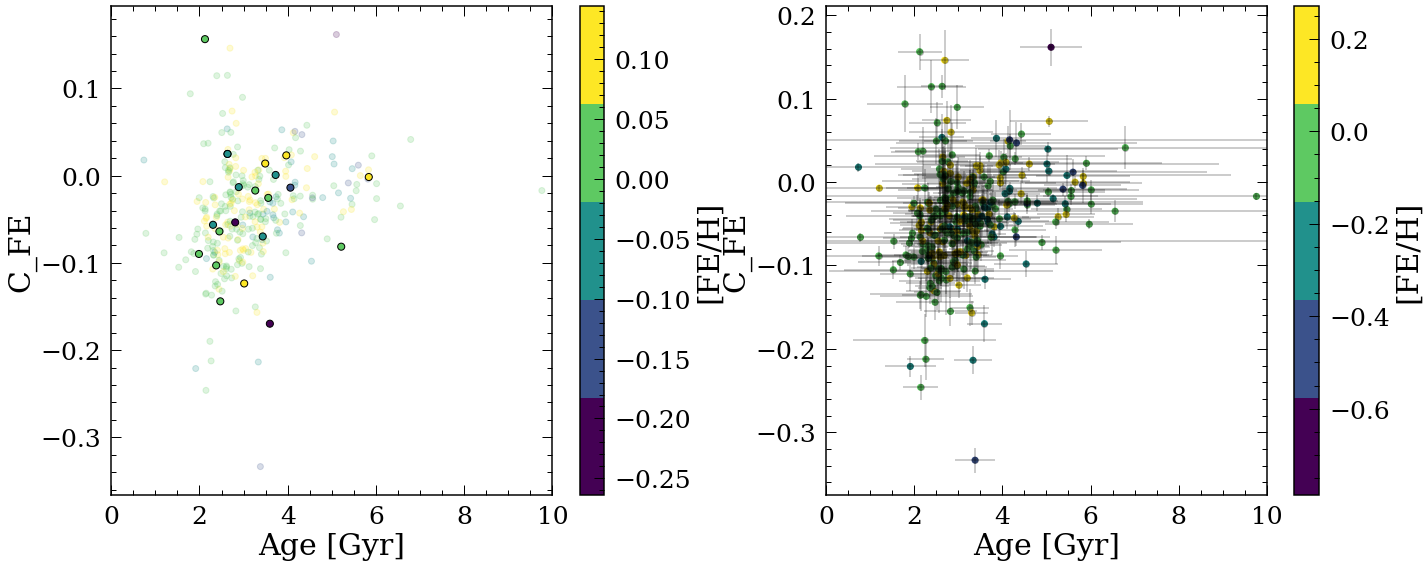

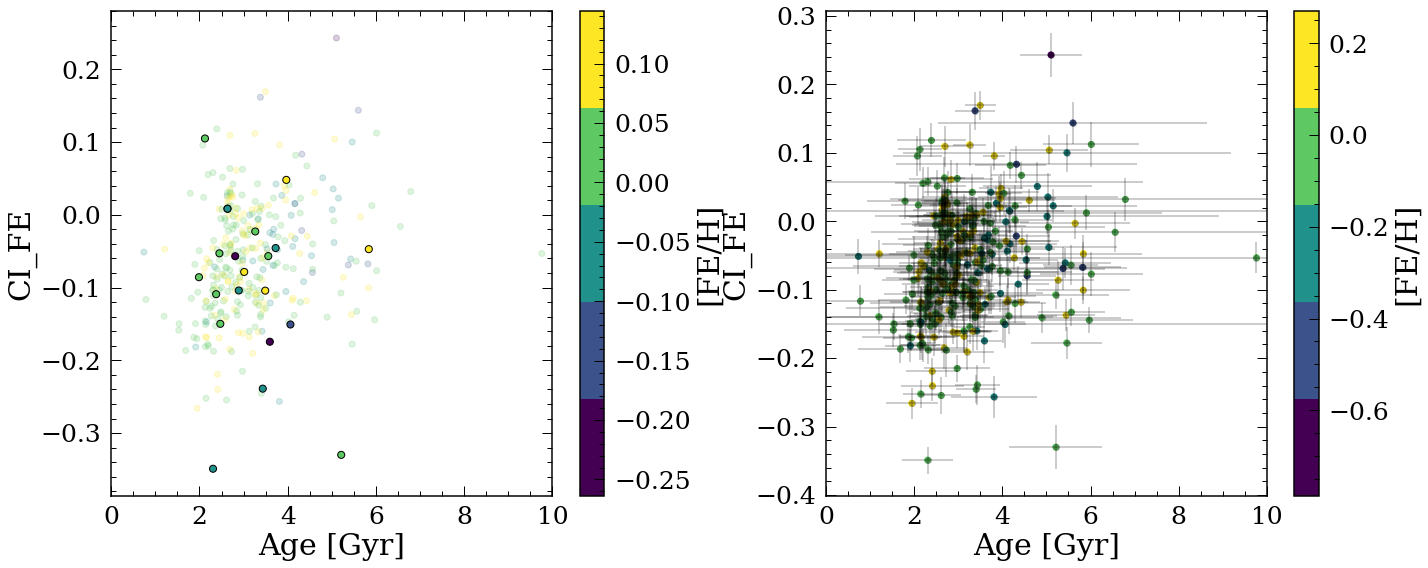

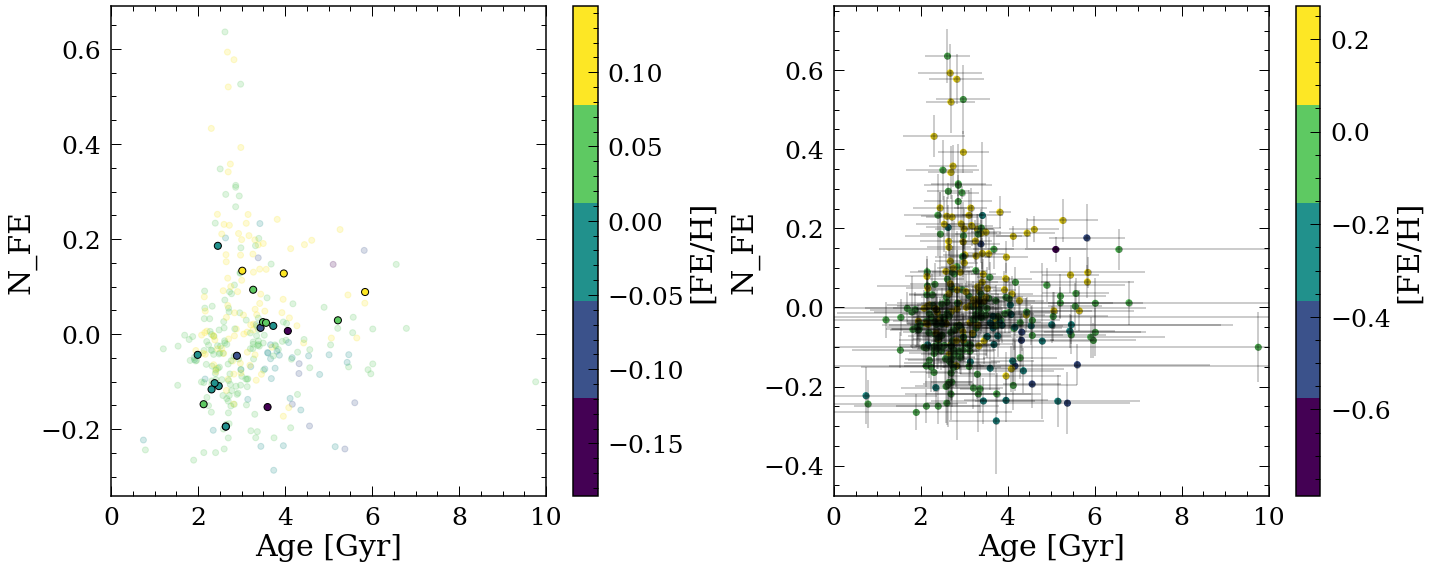

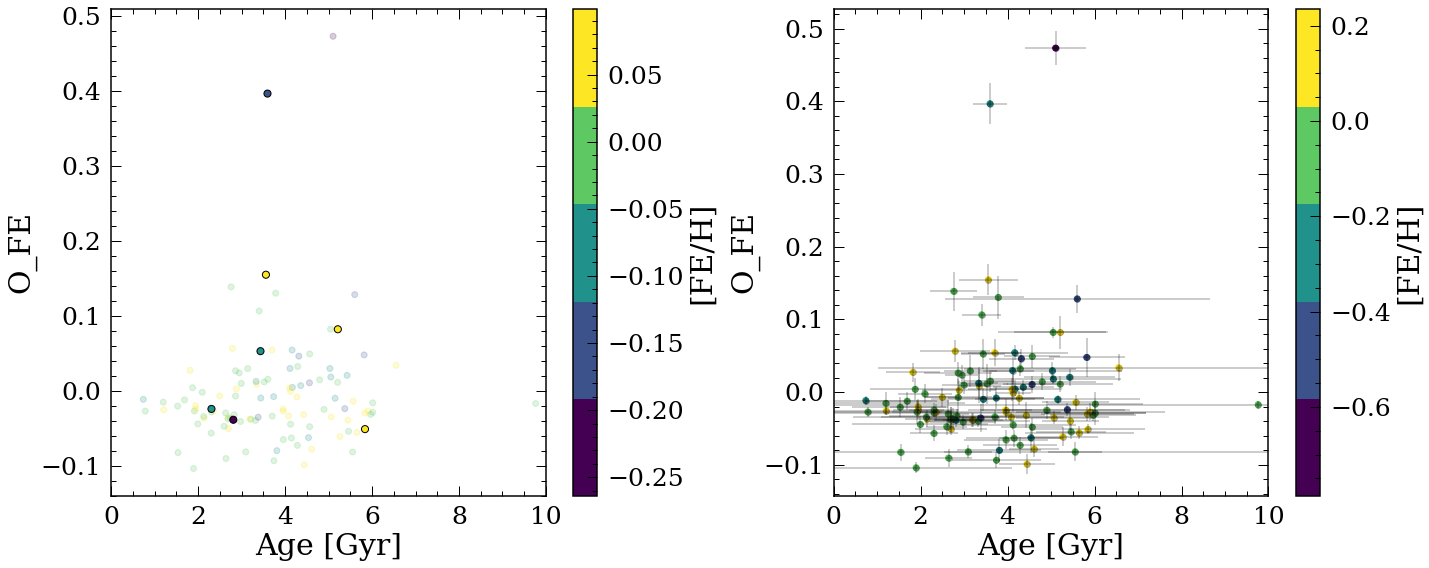

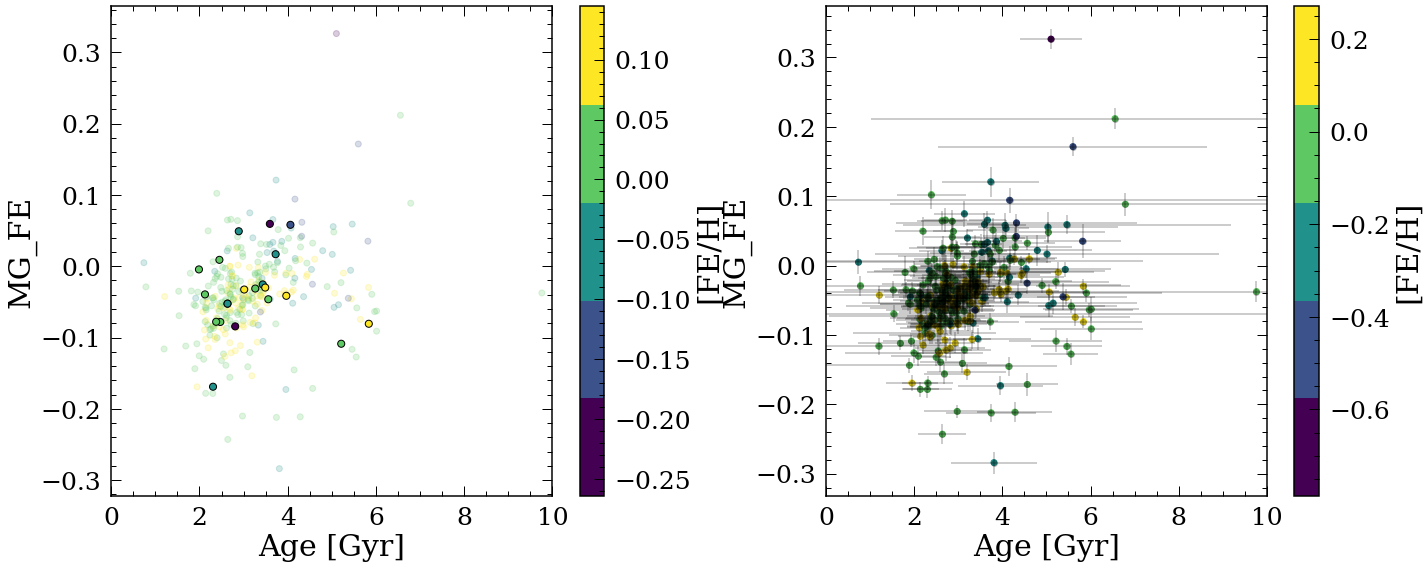

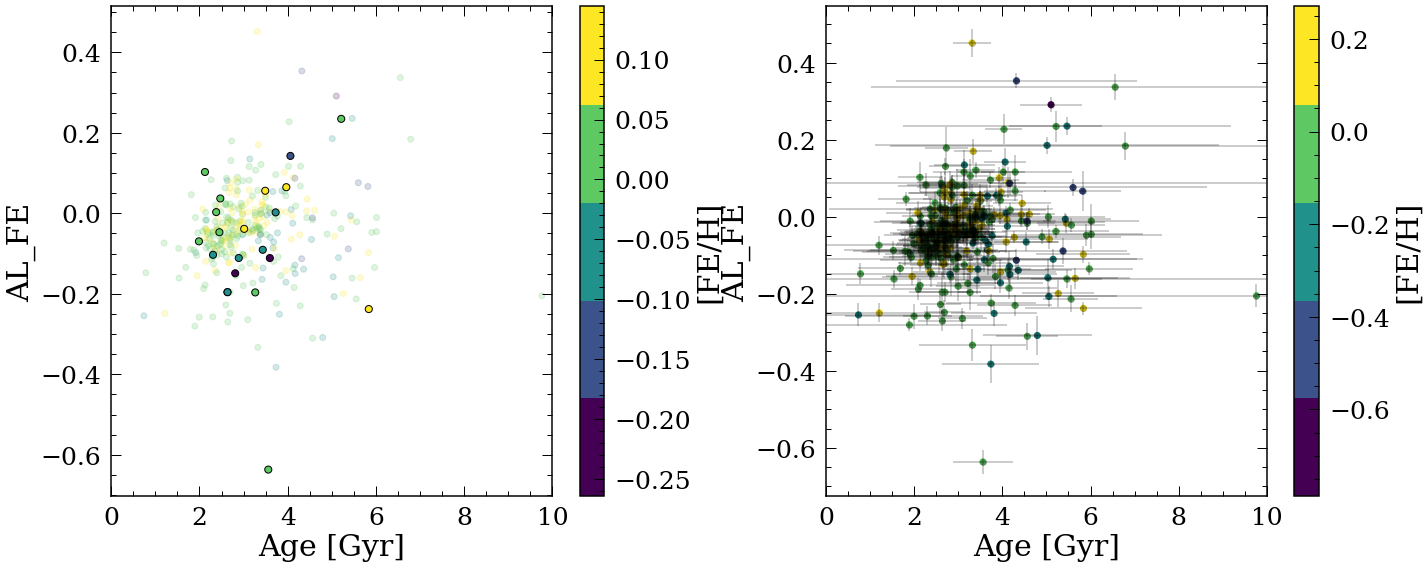

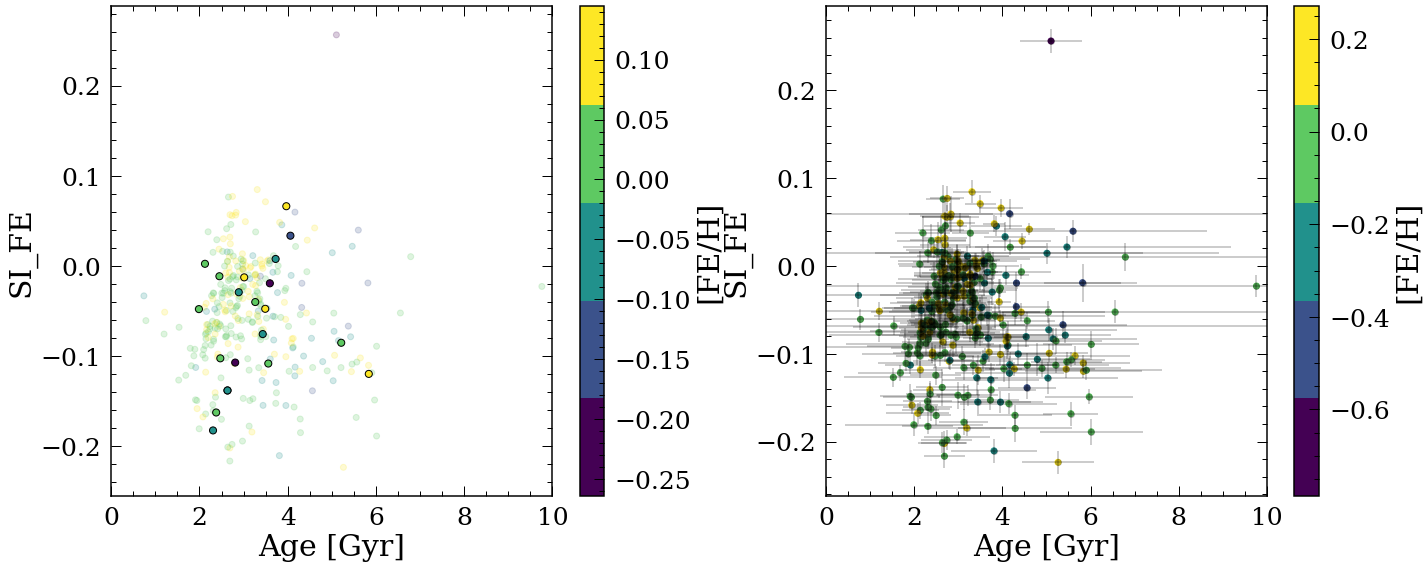

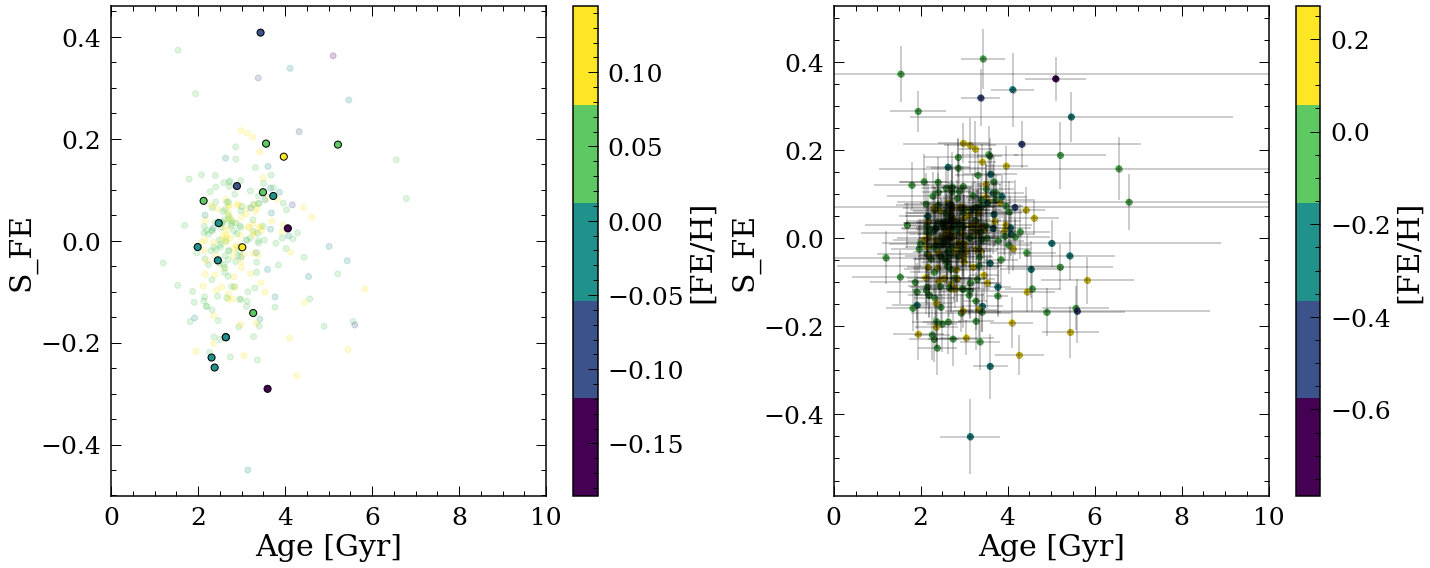

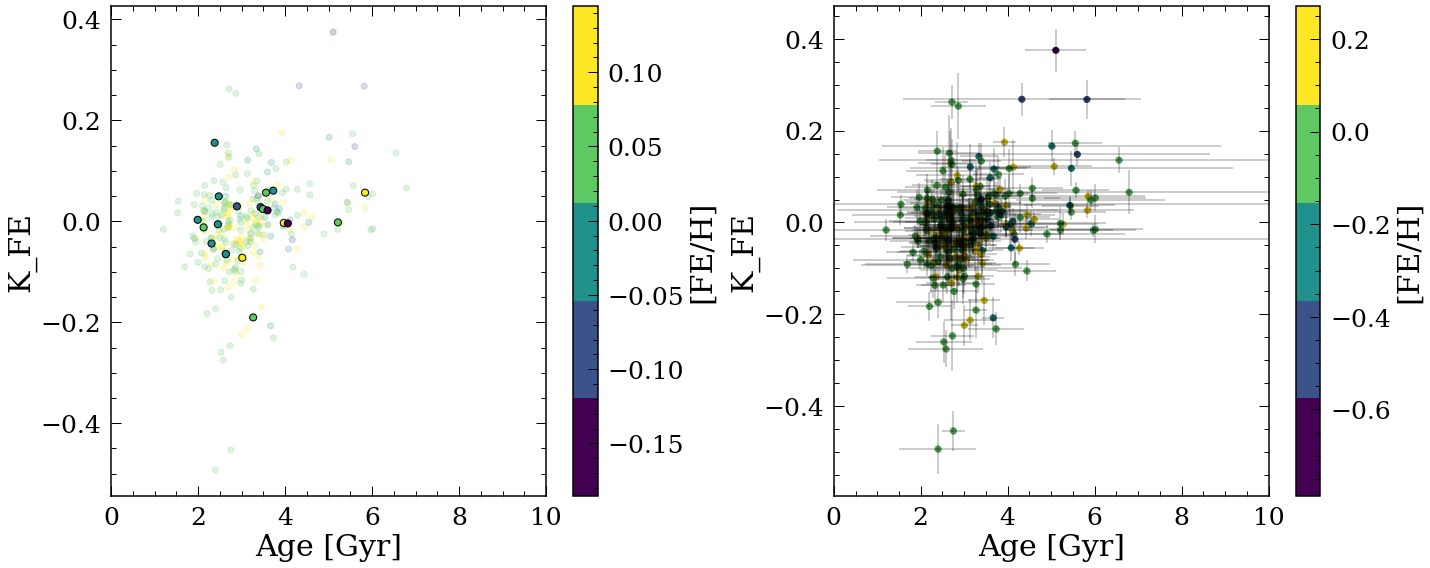

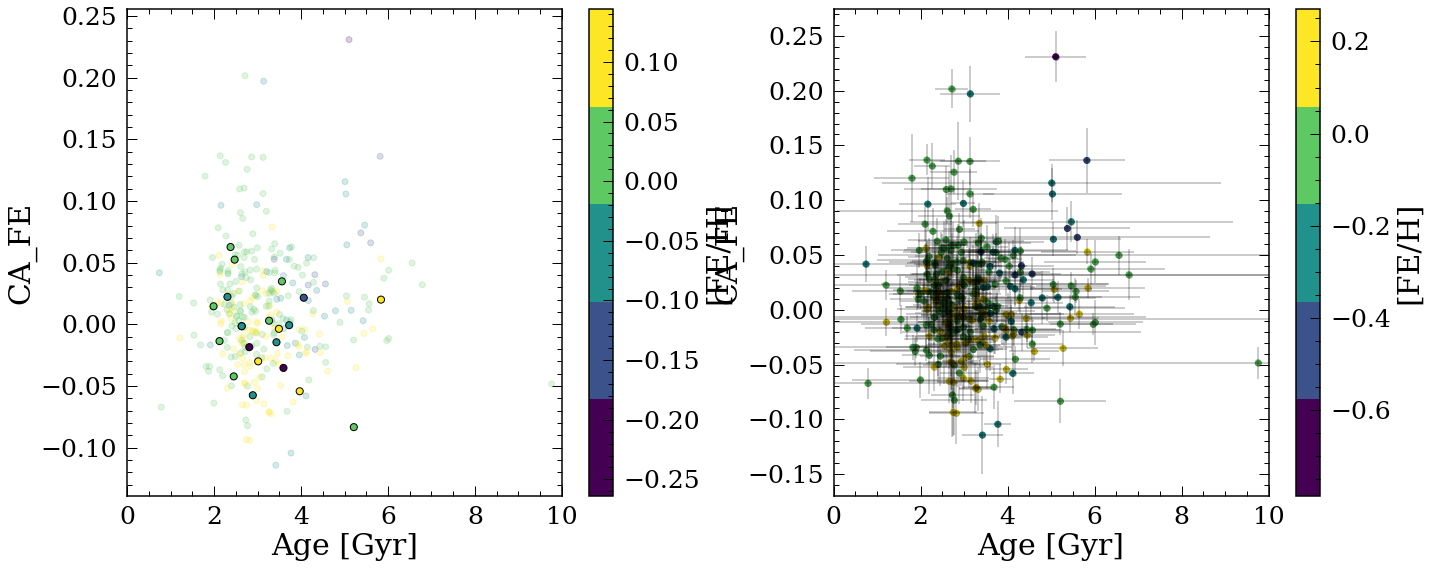

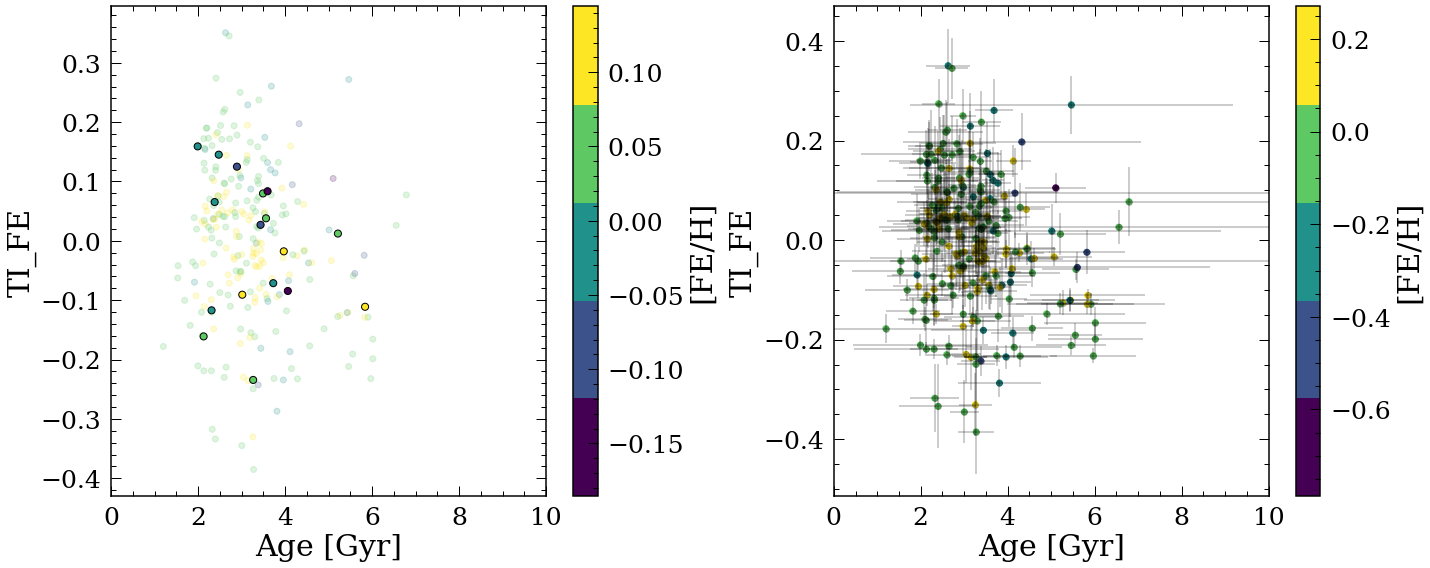

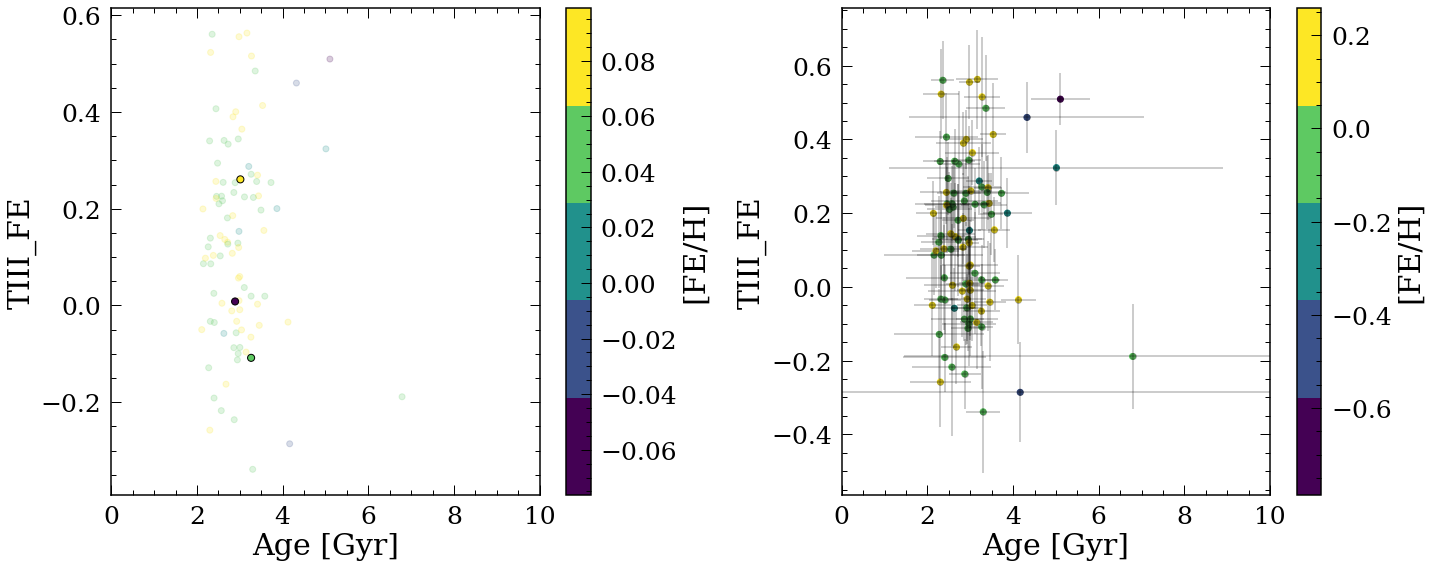

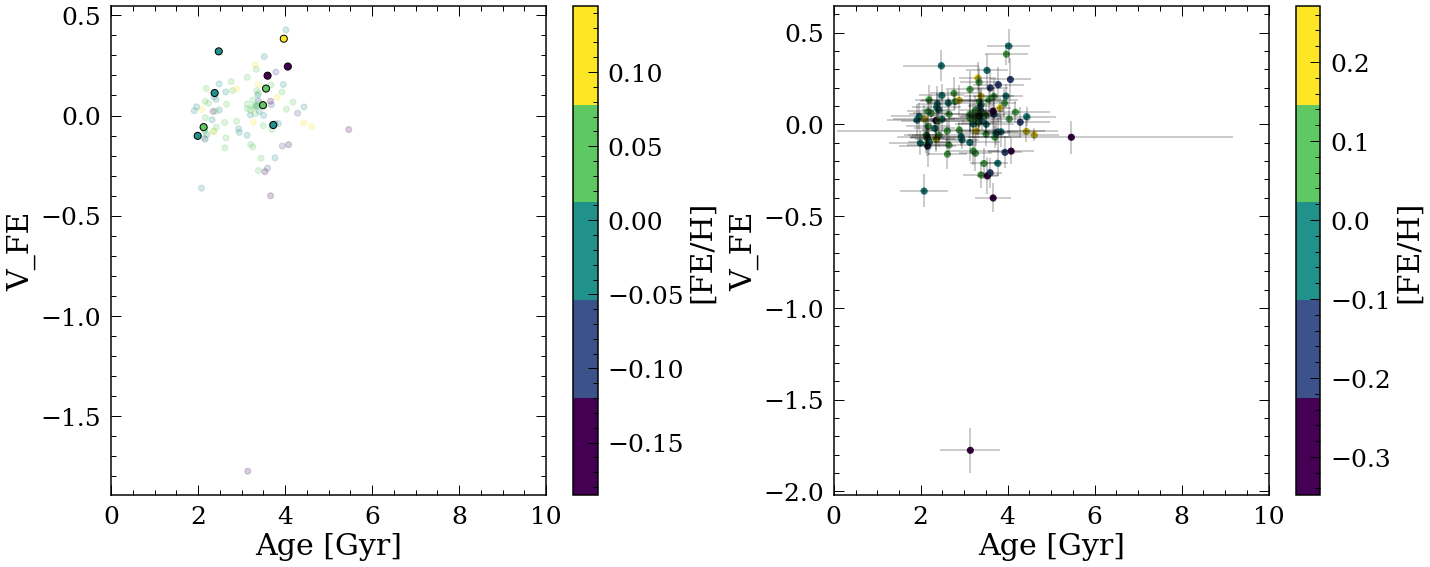

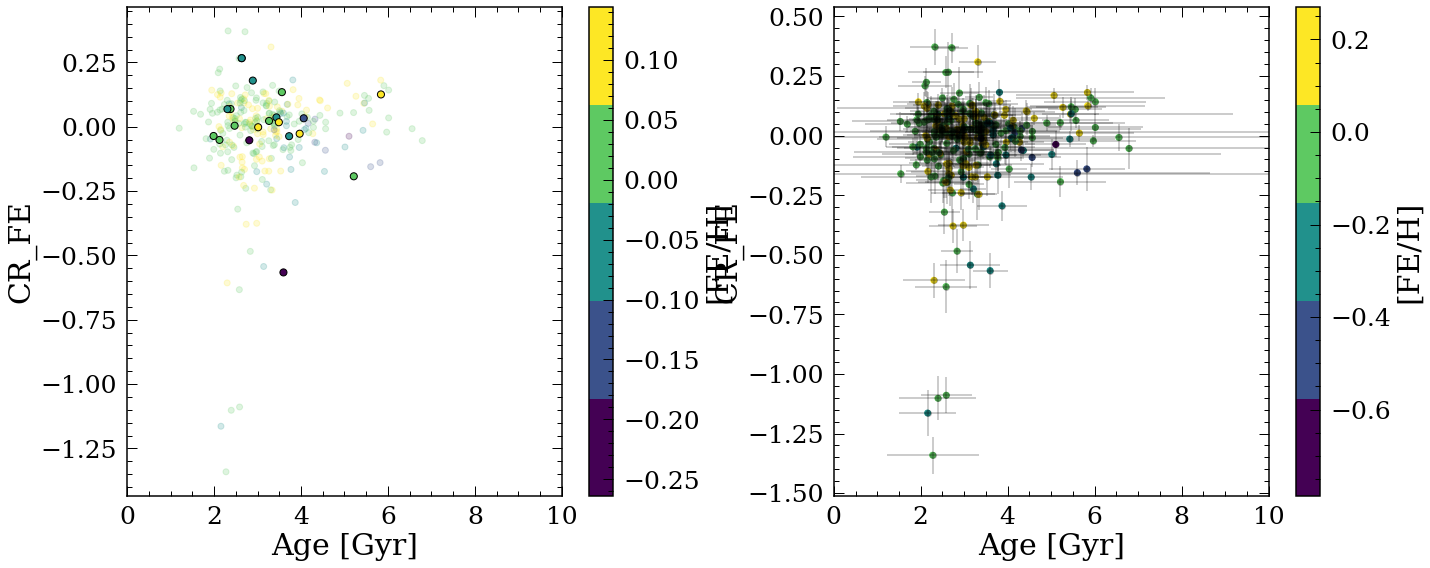

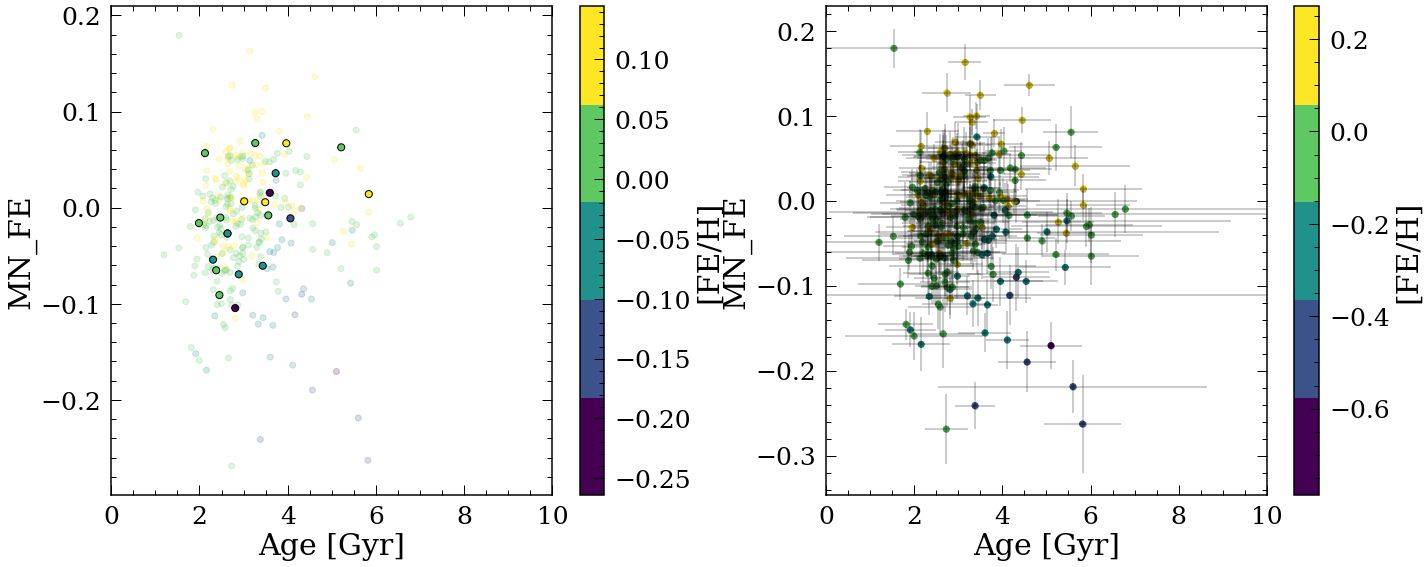

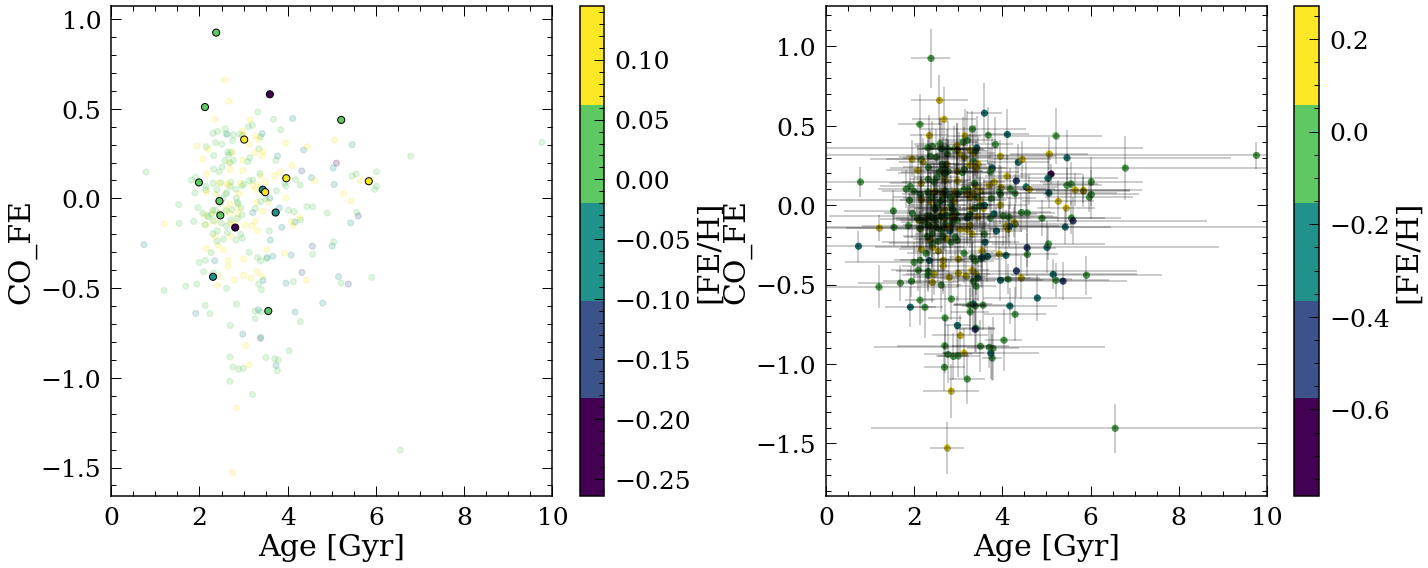

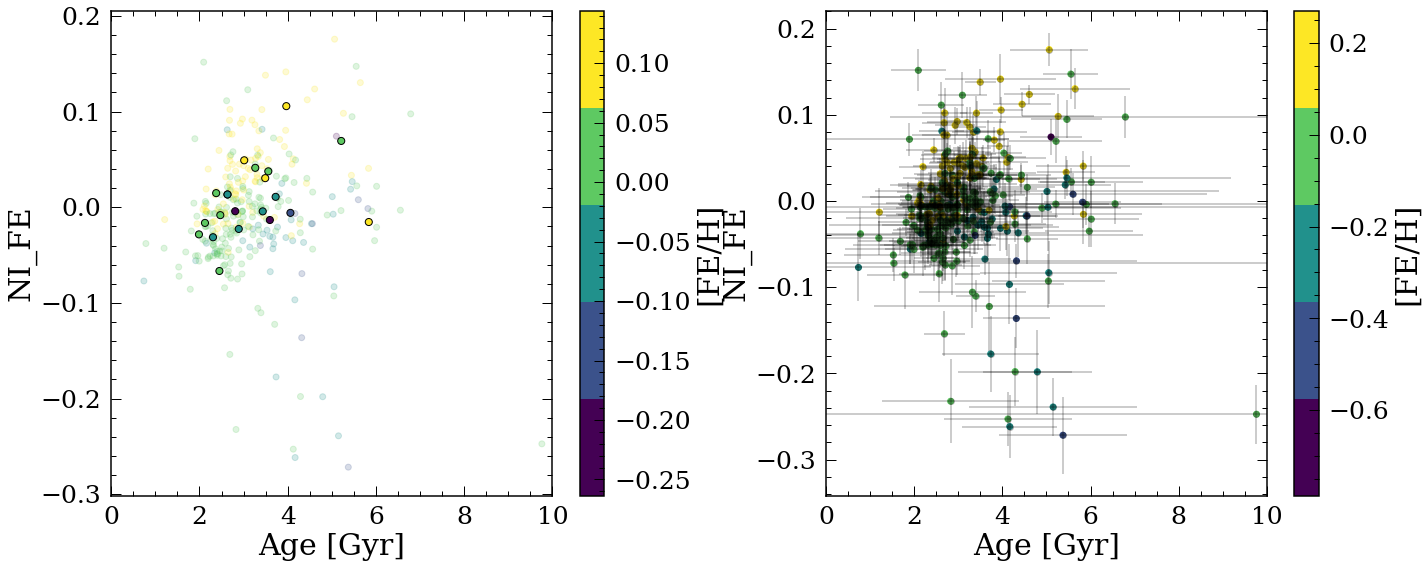

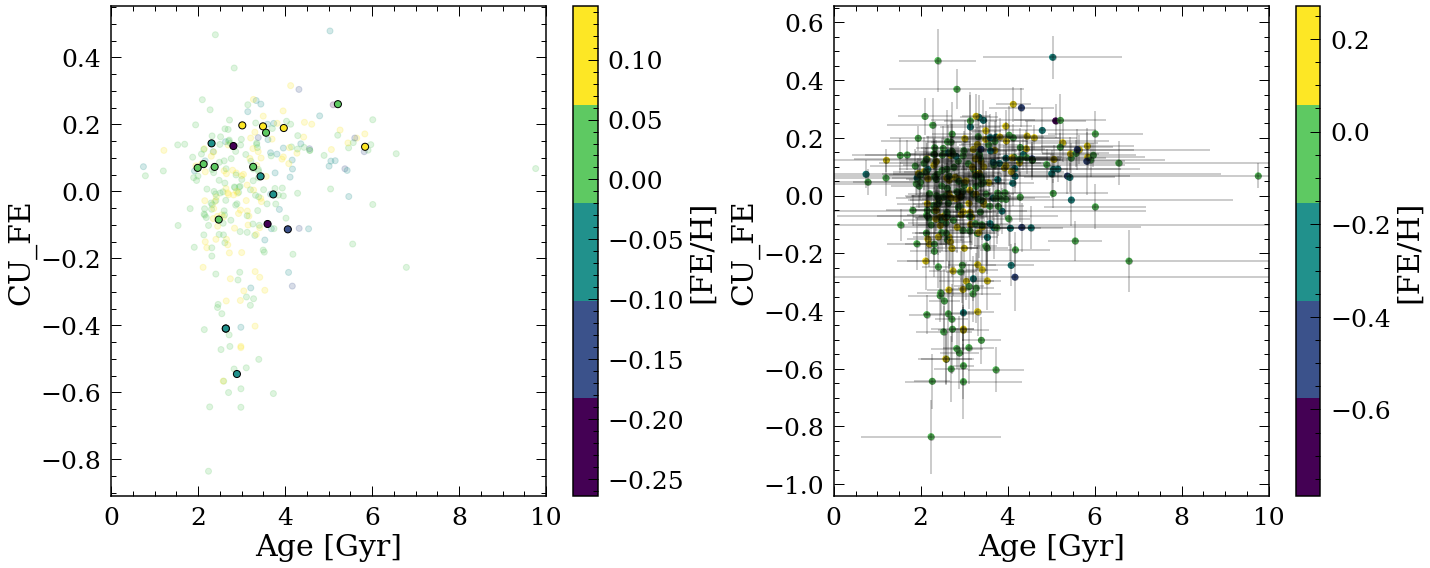

In [31]:
cm = plt.cm.get_cmap('viridis',5)
for i in range(len(cols)):
    checkabd=cols[i]
    df_plot=df_bin_MS.loc[df_bin_MS[checkabd]>-100]
    df_plot_KOI=df_NN_MS_KOI.loc[df_NN_MS_KOI[checkabd]>-100]
    if len(df_plot)>10:
        plt.figure(figsize=(20,8))
        plt.subplot(1,2,1)
        plt.scatter(df_plot['age_MAD'],df_plot[checkabd],c=df_plot['FE_H'],cmap=cm,alpha=0.2)
        plt.scatter(df_plot_KOI['age_MAD'],df_plot_KOI[checkabd],c=df_plot_KOI['FE_H'],cmap=cm,s=50,edgecolor='k')
        plt.ylabel(checkabd)
        plt.xlim([0,10])
        plt.xlabel('Age [Gyr]')
        cb=plt.colorbar()
        cb.set_label('[FE/H]')
        
        plt.subplot(1,2,2)
        plt.errorbar(df_plot['age_MAD'],df_plot[checkabd],
                 yerr=df_plot[checkabd+"_ERR"],xerr=df_plot["age_MAD_err"],fmt='ko',alpha=0.2)
        plt.scatter(df_plot['age_MAD'],df_plot[checkabd],c=df_plot['FE_H'],cmap=cm)
        plt.ylabel(checkabd)
        plt.xlim([0,10])
        plt.xlabel('Age [Gyr]')
        cb=plt.colorbar()
        cb.set_label('[FE/H]')
        
        plt.tight_layout()
        #plt.savefig('NewData/Abund/'+checkabd+'_MS.png')
        #plt.xlim([-0.5,0.5])